# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
data=pd.read_csv("C:\\Users\\DELL\\Downloads\\INNHotelsGroup.csv")

In [4]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [5]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


In [6]:
data.shape

(36275, 19)

### Observations:
There are **36,275 Rows** and **19 Columns** in the given data.



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Observations:
*  There are **14 Numerical** (float64(1) & int64(13)) and **5 Categorical** (object)  datatypes.
*  The target variable is the **booking status**, which is of object type.
* There are no missing values in the data set



In [8]:
data.isnull().sum().sum()

0

### Observations:
*   There are **no Null** values in the data.

In [9]:
data.duplicated().sum()

0

### Observations:
*   There are **no duplicate** values in the data.

In [10]:
data.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [11]:
data['market_segment_type'].value_counts(normalize=True)

Online          0.63994
Offline         0.29023
Corporate       0.05560
Complementary   0.01078
Aviation        0.00345
Name: market_segment_type, dtype: float64

### Observations:
Majority of guests have done Online Bookings.

In [12]:
data.drop('Booking_ID',axis=1,inplace=True)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


The Booking id column is irrelevant to the classification problem so it has been dropped.





In [13]:
df=data.copy()

#### **Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [14]:
df["booking_status"] = df["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


### Observations:
*   Number of **week** nights the guest stayed or booked to stay at the hotel was approximately **2 day** on an average.
*   Number of **weekend** nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel was approximately **1 day** on an average.
*  Majority of the guests didnt require for a parking space
*  Maximum lead time i.e, Number of days between the date of booking and the arrival date is **443 days** which is unusually long.
* On an Average the  guests do the booking  **85 days** before check-in.
* All the bookings provided in the data are from the year **2017 to 2018**.
* Max number of guests arrived in the month of **December** which is usually holidays.
* Only **2.6 %** of guests have revisited the hotel in 2 years.
* Average price of the room available is approximately **103 euros** and a  maximum range of **540 euros**.
* Around 33% of the **Bookings**  have been cancelled.





## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [16]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [17]:
def labeled_barplot(data, feature,name, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 4))
    else:
        plt.figure(figsize=(n + 2, 4))
    plt.xticks(rotation=0, fontsize=10)
    ax = sns.countplot(data=data,x=feature,palette="Paired",order=data[feature].value_counts().index[:n])

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points")
    plt.title(name);
    plt.show()

In [18]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [19]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

#### Average Price Per Room

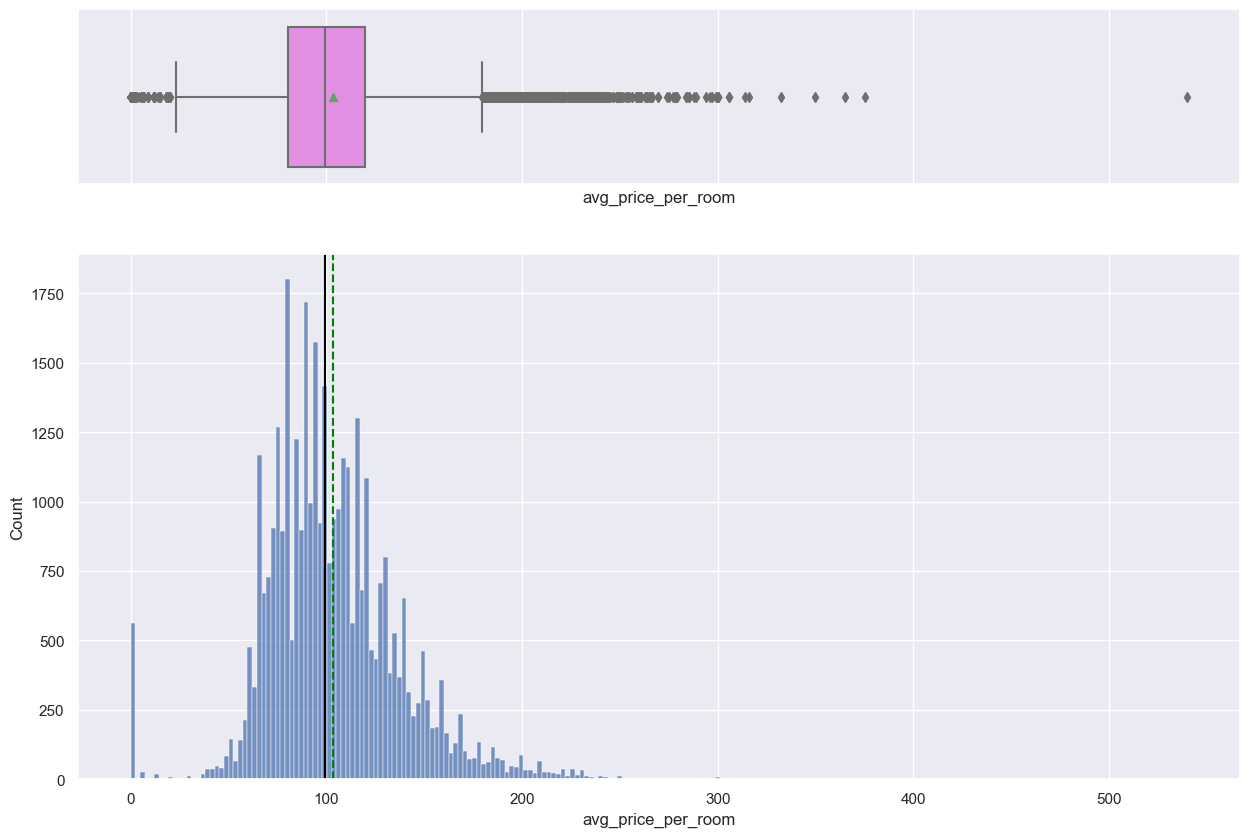

In [20]:
histogram_boxplot(df, "avg_price_per_room")

In [21]:
df[df["avg_price_per_room"] == 0]
df.loc[df["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

In [22]:
# Calculating the 25th quantile
Q1 = df["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = df["avg_price_per_room"].quantile(0.75)  ## Complete the code to calculate 75th quantile for average price per room

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [23]:
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

#### Number of Adults:

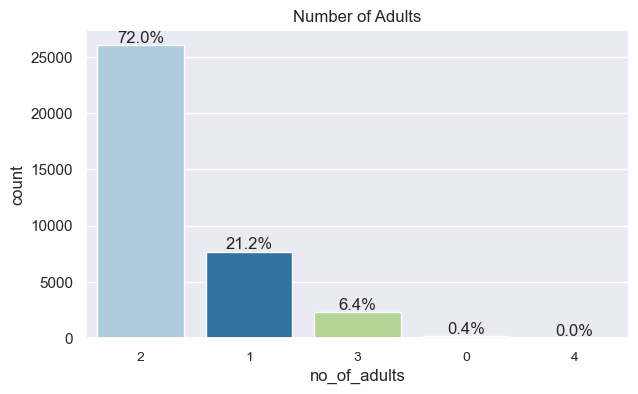

In [24]:
labeled_barplot(df, "no_of_adults","Number of Adults", perc=True)

### Observations:
Majority of around **72 %** of bookings were made for 2 Adults.

#### Number of Children:

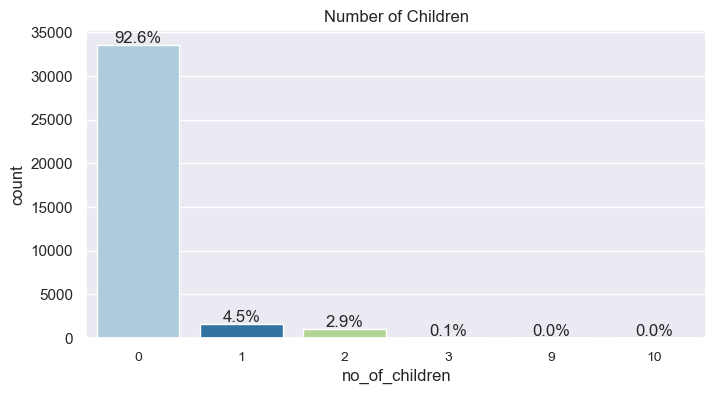

In [25]:
labeled_barplot(df, "no_of_children","Number of Children", perc=True)

In [26]:
df['no_of_children'].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

### Observations:
* Around **93 %** of bookings didn't inculde Children.
* There are 3 bookings with more than 9 Children which seems unusual.

In [27]:
# replacing 9, and 10 children with 3
df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

#### Number of Weekend Nights:

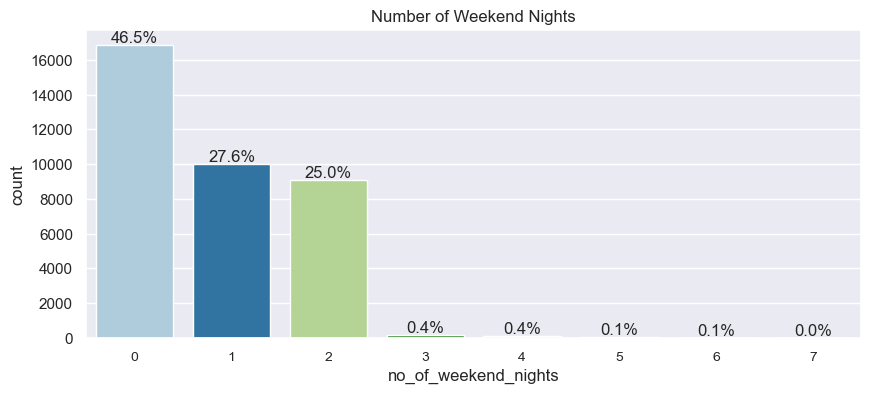

In [28]:
labeled_barplot(df, "no_of_weekend_nights","Number of Weekend Nights", perc=True)

### Observations:
* Around 47% of guest do not spend the weekend nights
* There is an aproximate equal percentage of  guests who spend weekend nights at the hotel.



#### Number of Week Nights:

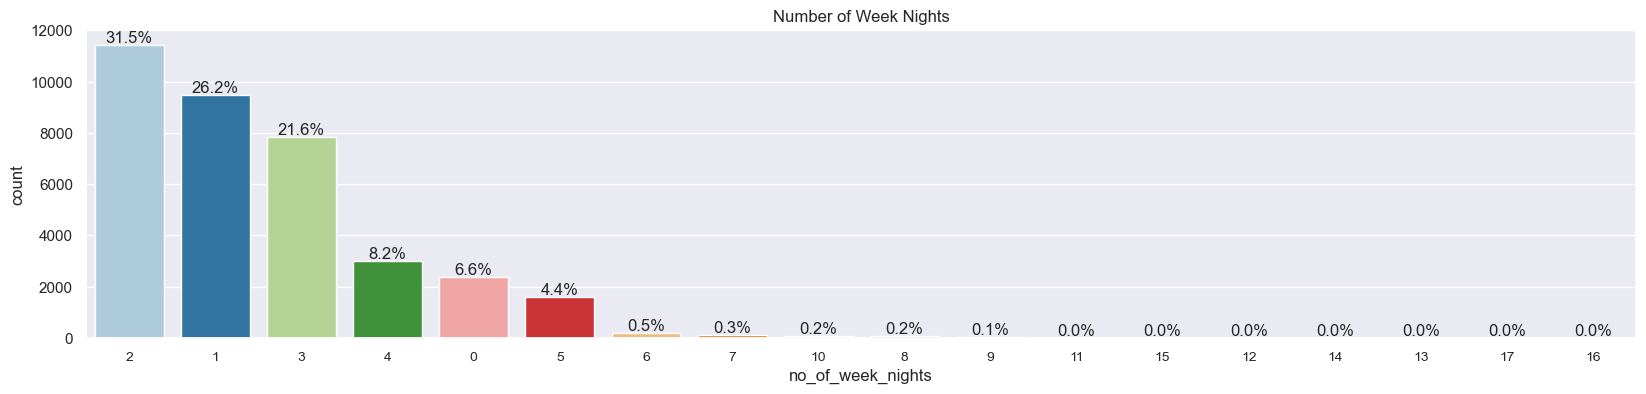

In [29]:
labeled_barplot(df, "no_of_week_nights","Number of Week Nights", perc=True)

### Observations:
* 31.5 % of guests book for 2 days stay during weeknights followed by 26.2% for 1 day stay.



#### Meal Plan Type:

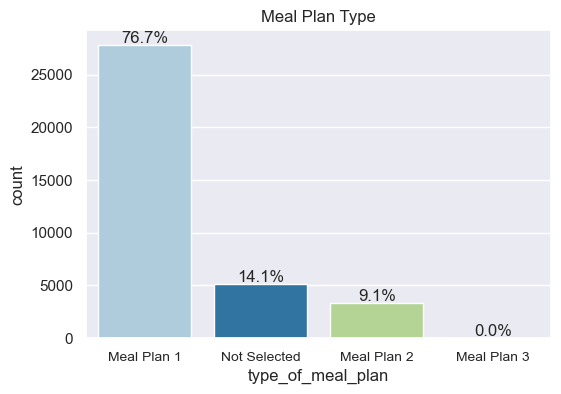

In [30]:
labeled_barplot(df, "type_of_meal_plan","Meal Plan Type", perc=True)

In [31]:
df['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

### Observations:
* Majority of 76.7% of guests have opted  for Meal Plan 1 that is Breakfast.
* Meal plan 3 has been opted by 5 guests in 2 years making it the least opted plan.
* 14.1 % of guests have not selected any Meal plan.



#### Car Parking Space:

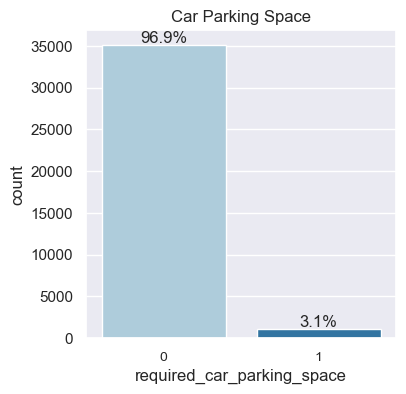

In [32]:
labeled_barplot(df, "required_car_parking_space","Car Parking Space", perc=True)

### Observations:
* 96.9% of guests who visited the hotel did not require a car parking space.



#### Type of room reserved:

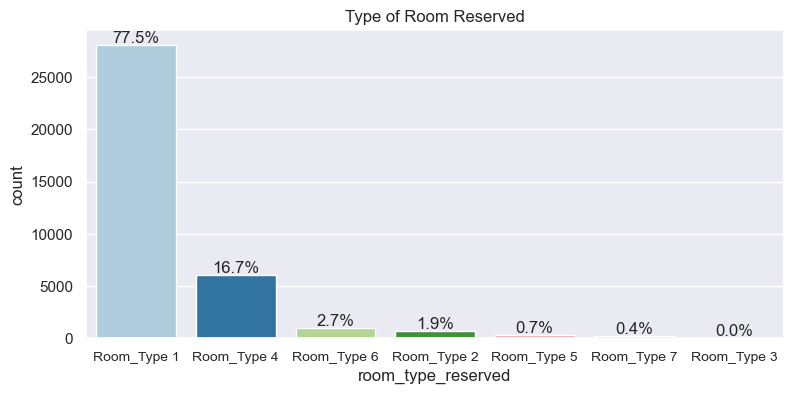

In [33]:
labeled_barplot(df, "room_type_reserved","Type of Room Reserved", perc=True)

### Observations:
* 77.5% of the guests have opted for Room Type_1 followed by 16.7% for Room Type_2.




#### Lead Time (Booking Date to Arrival Date):

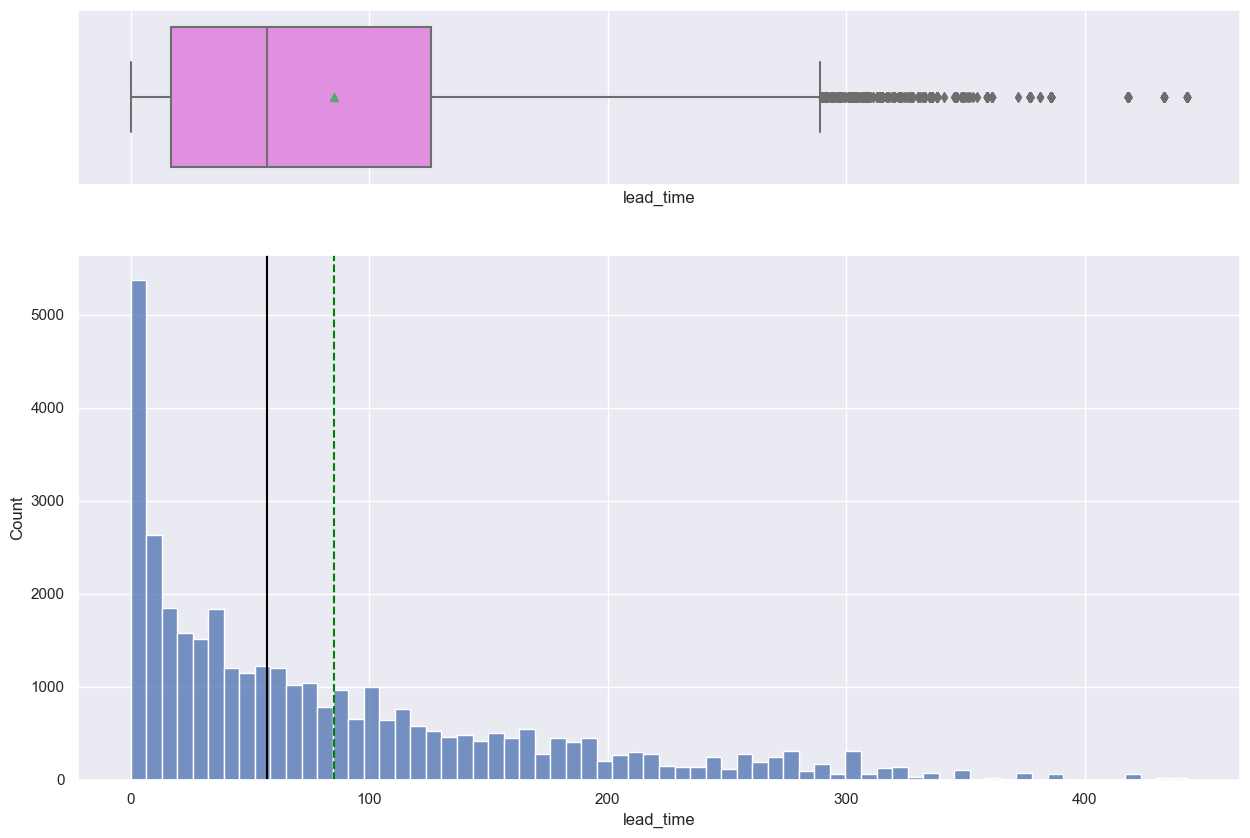

In [34]:
histogram_boxplot(df, "lead_time")

### Observations:
* Lead Time data shows a right skewed Distribution.
* Majority of the guest have did the booking had the same day of arrival.
* There are Outliers present in the Upper end.




#### Arrival Year:

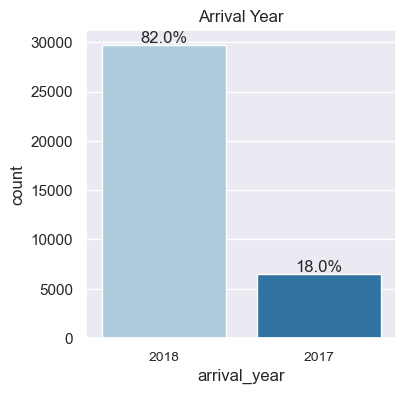

In [35]:
labeled_barplot(df, "arrival_year","Arrival Year", perc=True)

### Observations:
* Two years of data has been provided from 2017 to 2018.
* Majority of around 82% of bookings were carried out in the year 2018.

#### Arrival Date:

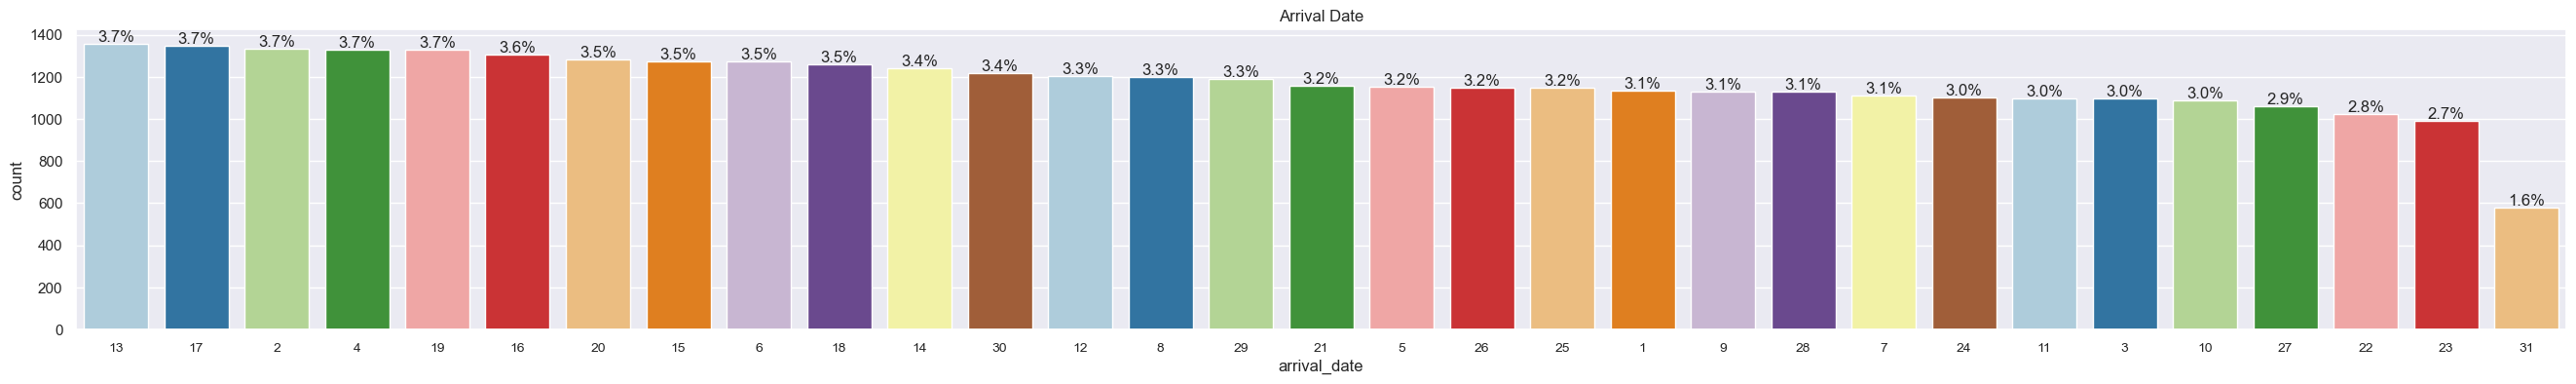

In [36]:
labeled_barplot(df, "arrival_date","Arrival Date", perc=True)

### Observations:
* Arrival dates are approxiamtely evenly distributted with 31st being the lowest percentage arrival date by the guests.

#### Number of Previous Bookings Not Cancelled:

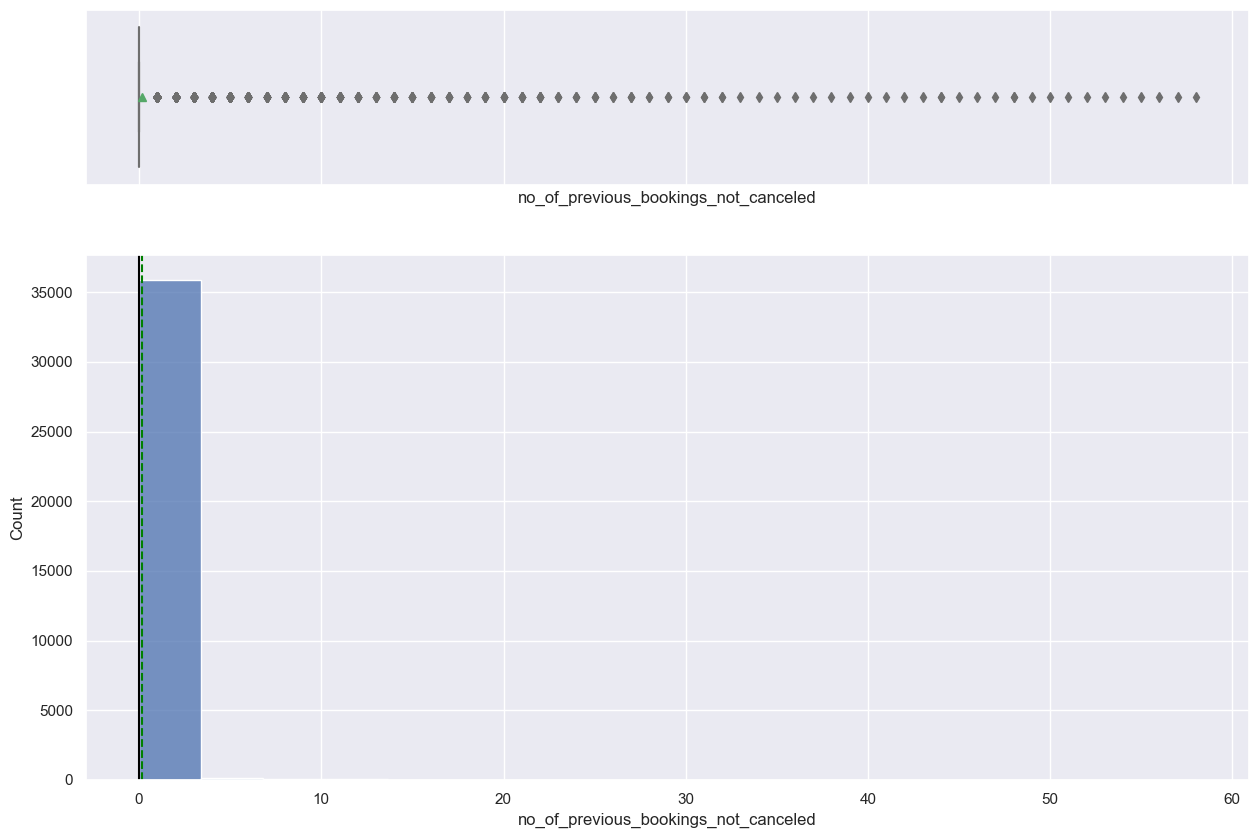

In [37]:
histogram_boxplot(df, "no_of_previous_bookings_not_canceled")

### Observations:
* Most of the guests have not cancelled their Bookings.
* There are few loyal customers who have booked  more than 50 times and have not cancelled.



#### Number of Previous Bookings Cancelled:

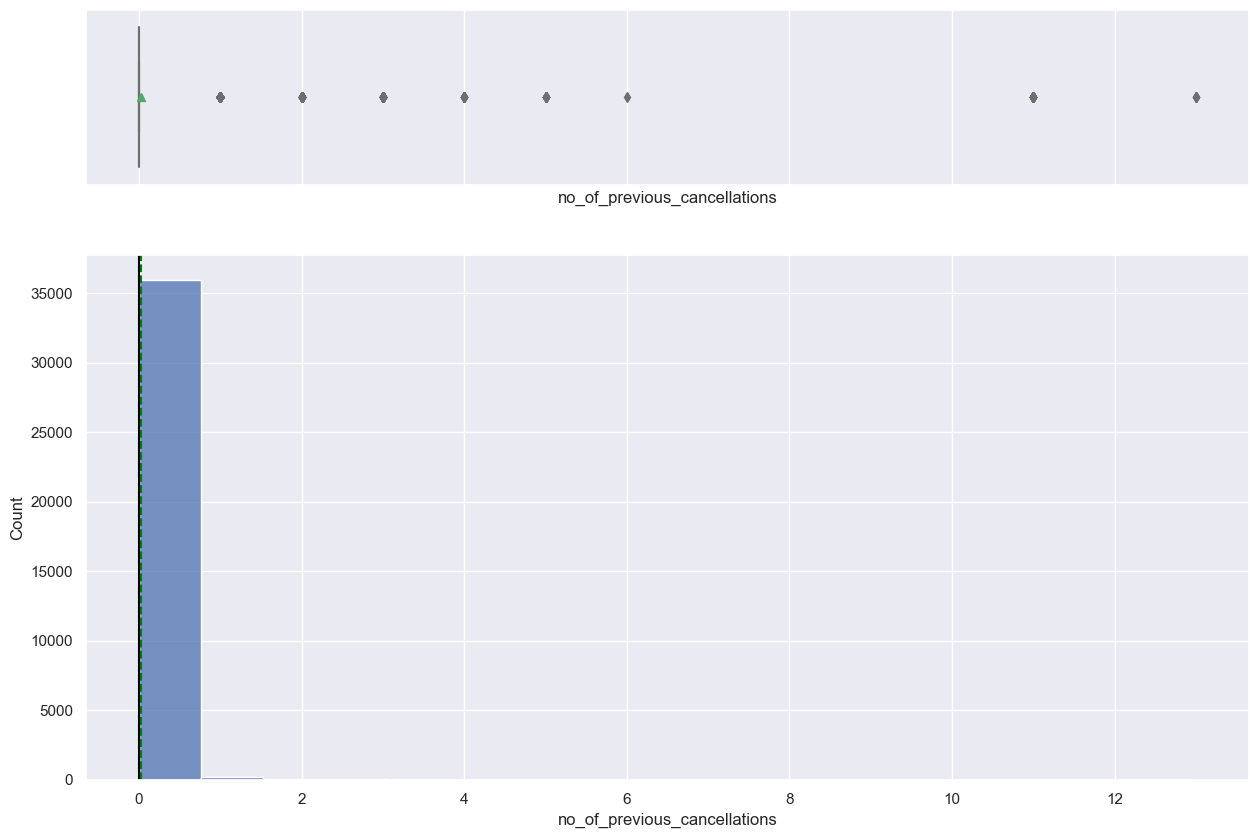

In [38]:
histogram_boxplot(df, "no_of_previous_cancellations")

In [39]:
df['no_of_previous_cancellations'].value_counts()

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

### Observations:
* Most of the customers cancelled the bookings only once.
* There are some customers who cancelled the booking more than 10 times.




## Bivariate Analysis:

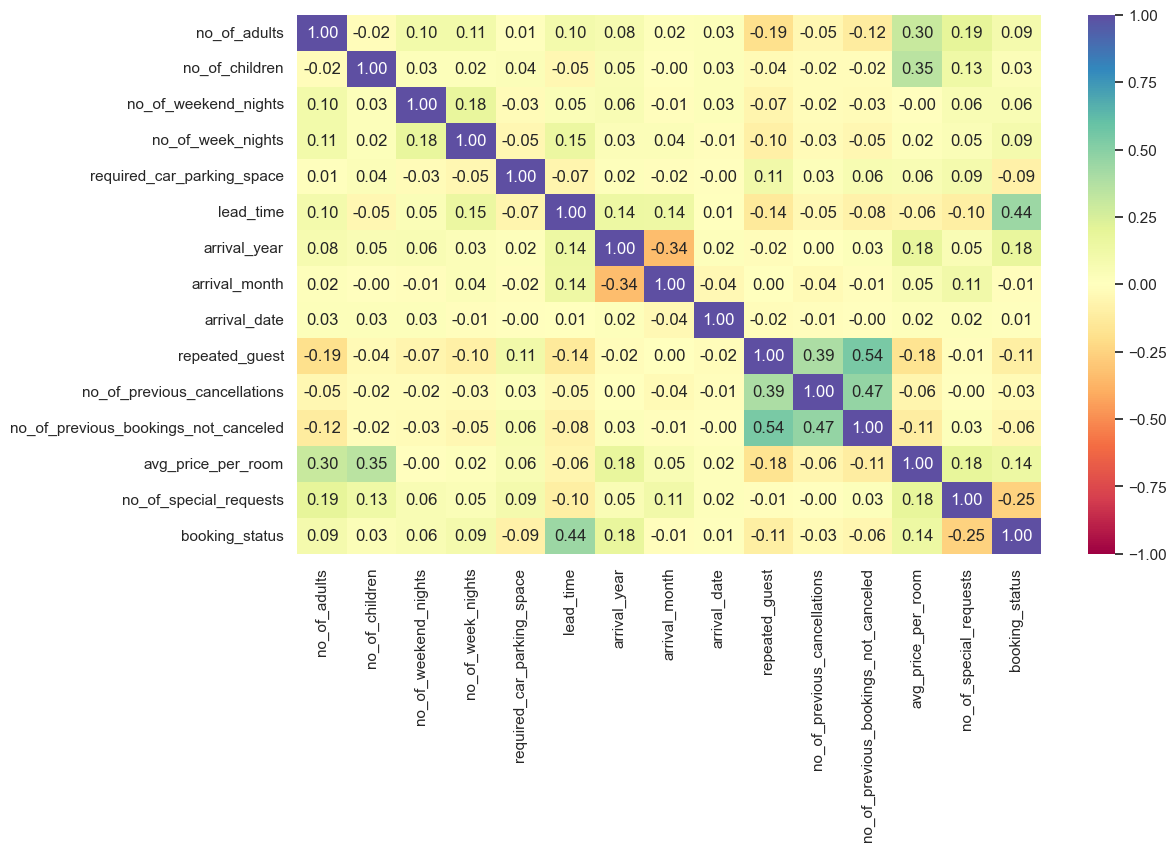

In [40]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

### Observations:
* There is a positive correlation between repeated guest and bookings not cancelled.
* There is a positive correlation between number of guests both adult and children and the Average price.
* There is a negative correlation between repeated guest and Average Price.
* There is a positive correlation between number of special requests and Average Price.
* There is a positive correlation between booking status and average price per room.
* There is a positive correlation between booking status and lead time.



#### Average Price and Repeated Guest

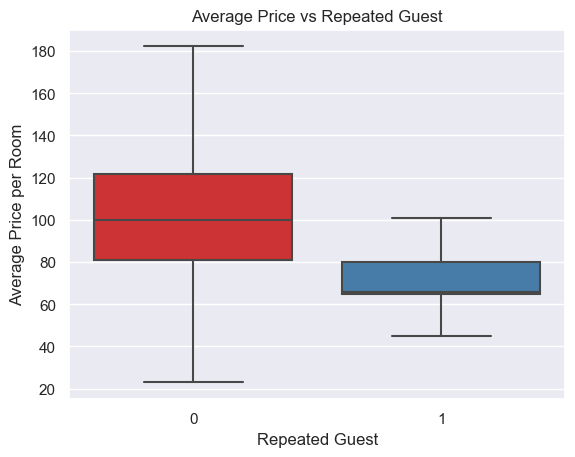

In [41]:
sns.boxplot(df,x="repeated_guest",y="avg_price_per_room",showfliers=False,palette="Set1");
plt.xlabel('Repeated Guest')
plt.ylabel('Average Price per Room')
plt.title('Average Price vs Repeated Guest');

### Observations:
* The Average price is lower for the Repeated guests,maybe the hotel provides some discount to loyal guests.




#### Average Price and Special Request

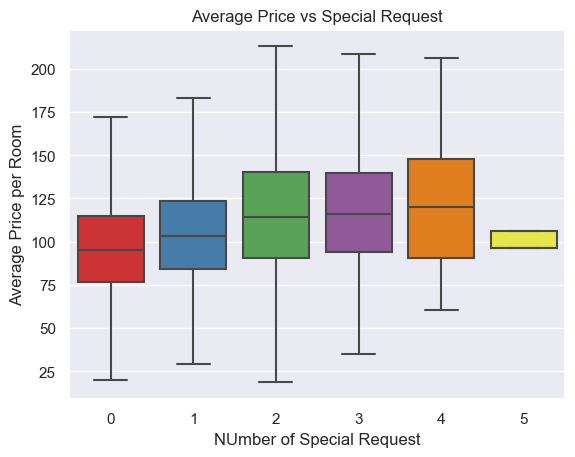

In [42]:
sns.boxplot(df,x="no_of_special_requests",y="avg_price_per_room",showfliers=False,palette="Set1");
plt.xlabel('NUmber of Special Request')
plt.ylabel('Average Price per Room')
plt.title('Average Price vs Special Request');

### Observations:
* Average price increases with increase in special requests.




#### Average Price and Arrival Month

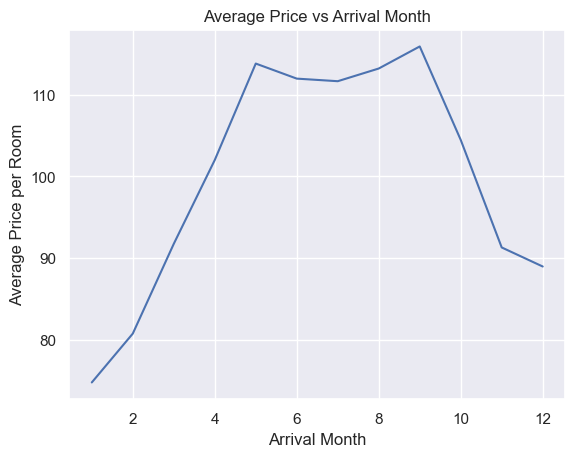

In [43]:
sns.lineplot(df,x="arrival_month",y="avg_price_per_room",ci=None);
plt.xlabel('Arrival Month')
plt.ylabel('Average Price per Room')
plt.title('Average Price vs Arrival Month');

### Observations:
* Average Prices are high from May to September.
* Comparitevly,January has the lowest Average price.




#### Average Price and Booking Status

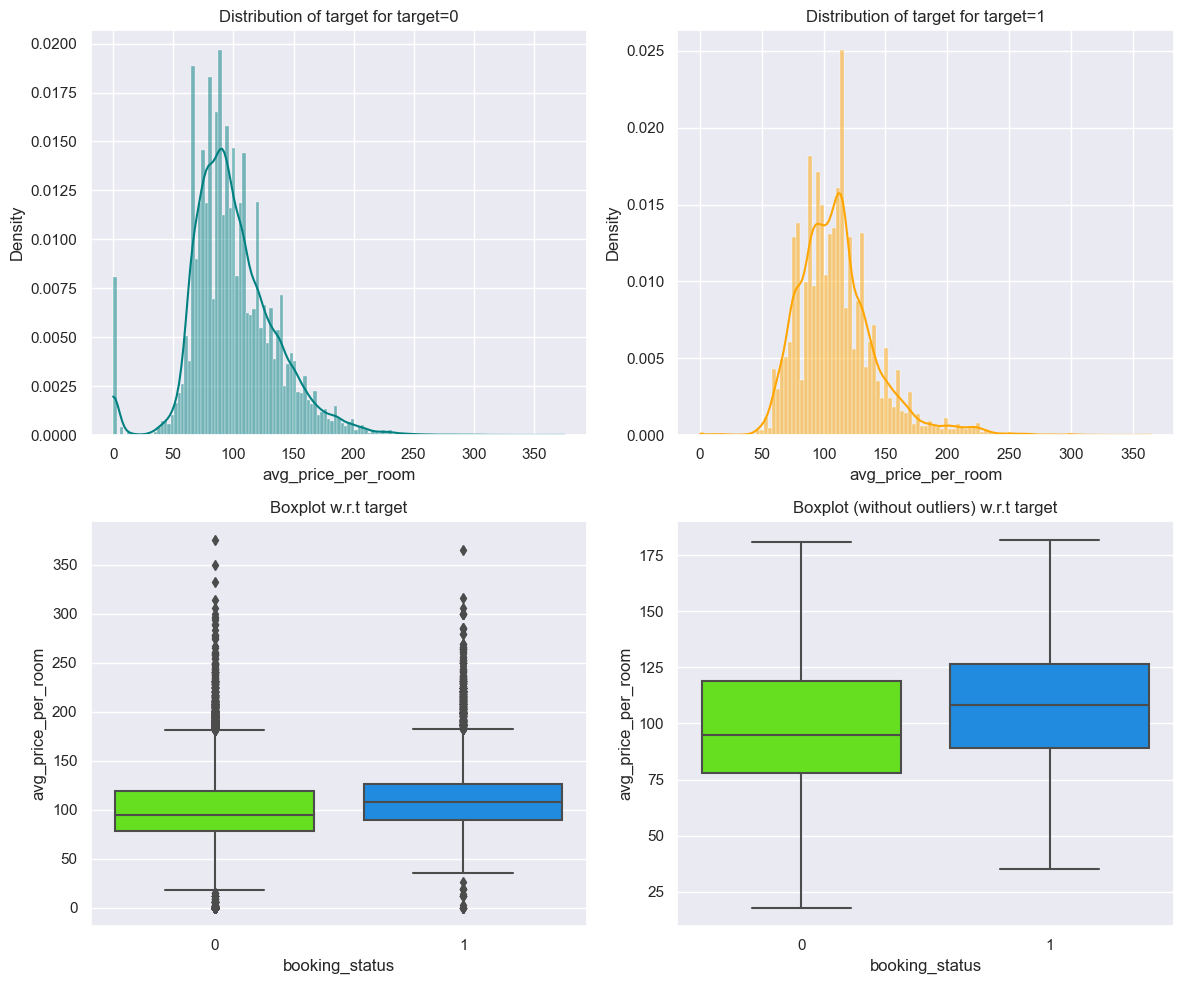

In [44]:
distribution_plot_wrt_target(df, 'avg_price_per_room', 'booking_status')

#### Lead time and booking status

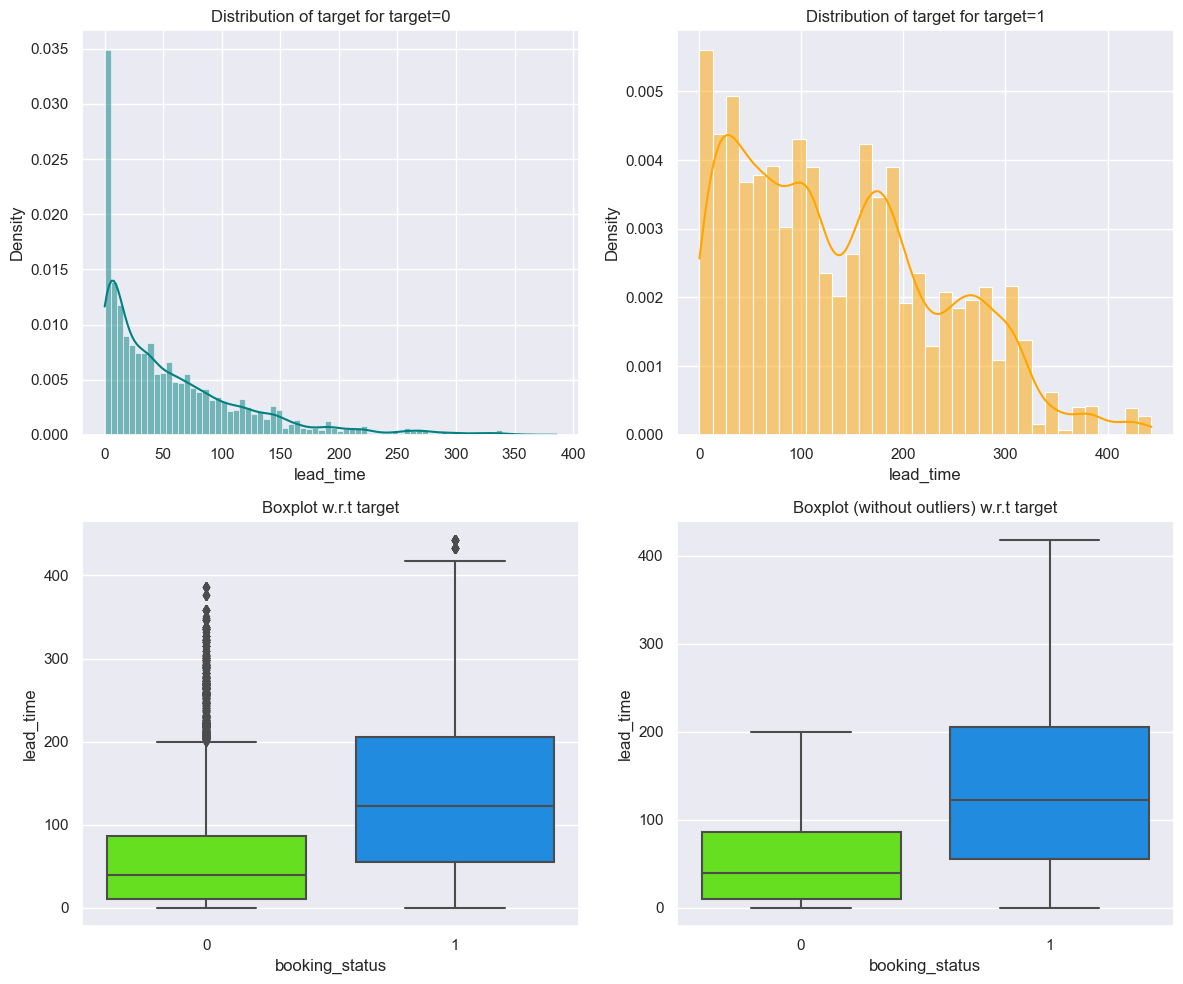

In [45]:
distribution_plot_wrt_target(df, 'lead_time', 'booking_status')

#### **Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status**.

In [46]:
df.booking_status.value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

In [47]:
family_data = df[(df["no_of_children"] >= 0) & (df["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

In [48]:
family_data["no_of_family_members"] = (family_data["no_of_adults"] + family_data["no_of_children"])

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


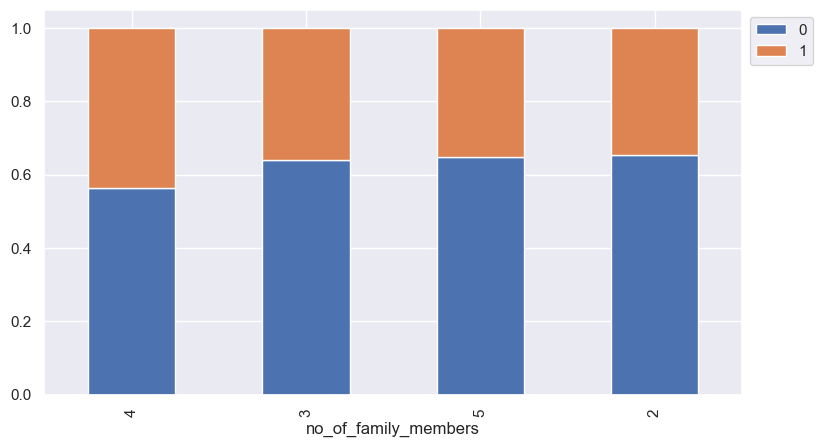

In [49]:
stacked_barplot(family_data,'no_of_family_members','booking_status')

The booking status has an equal chance of getting cancelled no matter for how many Number of people it was booked.

**Let's do a similar analysis for the customer who stay for at least a day at the hotel.**

In [50]:
stay_data = df[(df["no_of_week_nights"] > 0) & (df["no_of_weekend_nights"] > 0)]
stay_data.shape

(17094, 18)

In [51]:
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

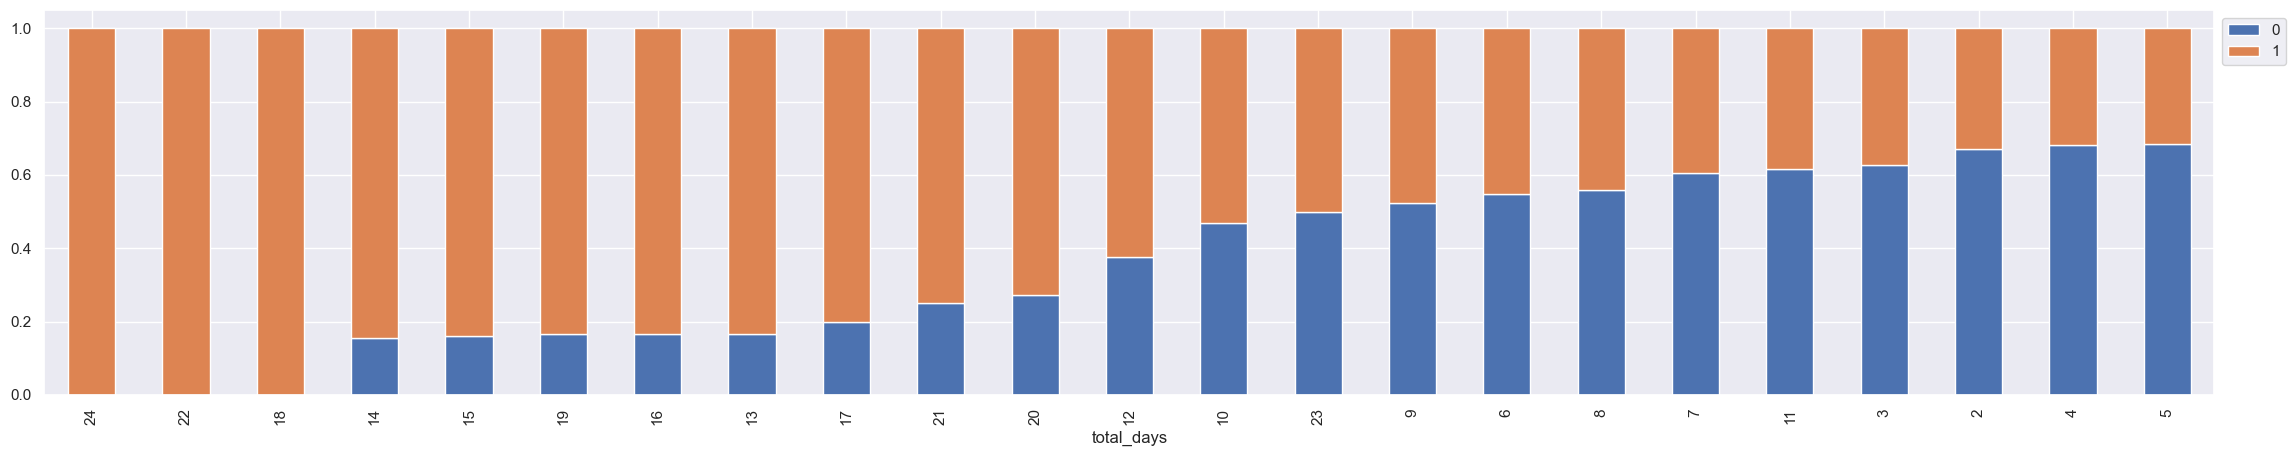

In [52]:
stacked_barplot(stay_data, "total_days", "booking_status")

There is an increase in chance of cancellation as the number of days of stay increases.

#### **1.What are the busiest months in the hotel?**

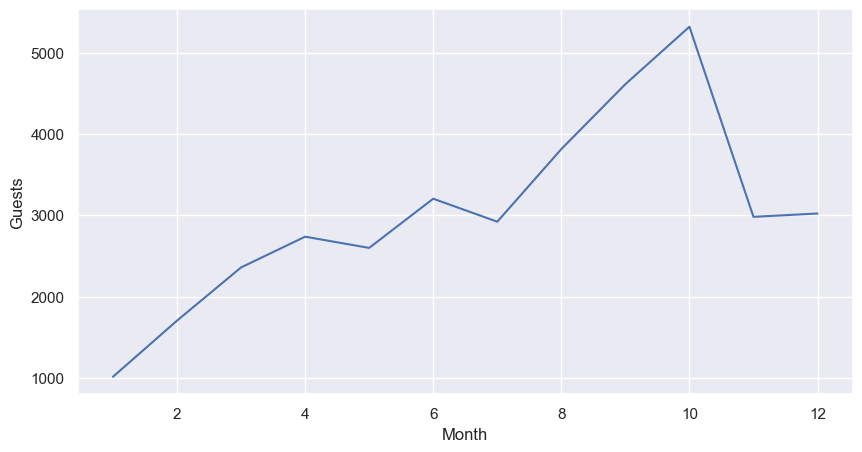

In [53]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = df.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

There is an Upward trend in the number of guests with a peak in the month of October.

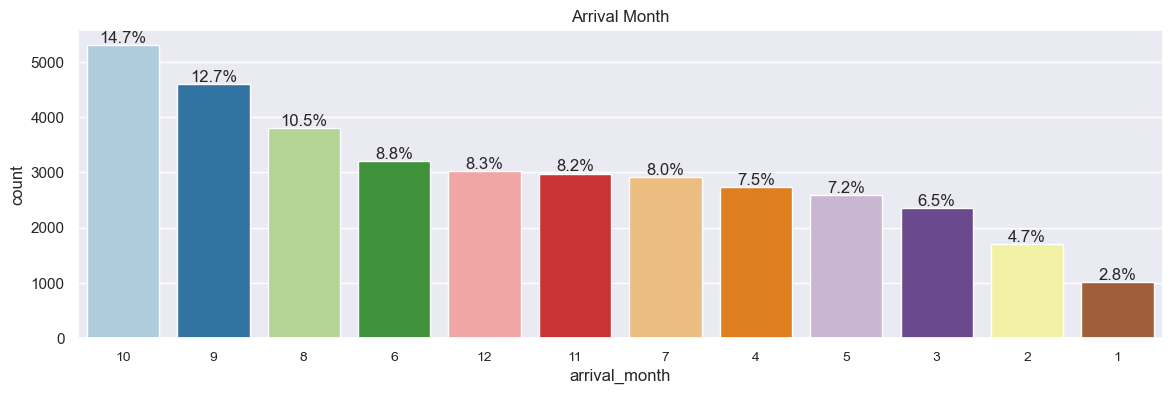

In [54]:
labeled_barplot(df, "arrival_month","Arrival Month", perc=True)

### Observations:
* September and October are the busiest Months with  12.7% and 14.7% of arrivals respectively.
* Comparitevly January registered the lowest number of guests.

#### **2.Which market segment do most of the guests come from?**

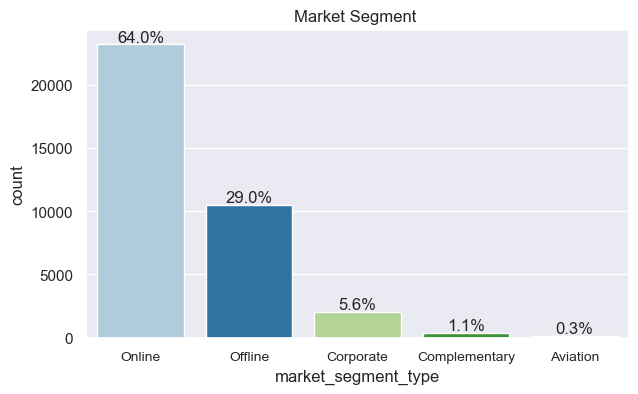

In [55]:
labeled_barplot(df, "market_segment_type","Market Segment ", perc=True)

### Observations:
* 64% of Bookings were carried out Online followed by 29% of Offline bookings.


#### **3.Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**:

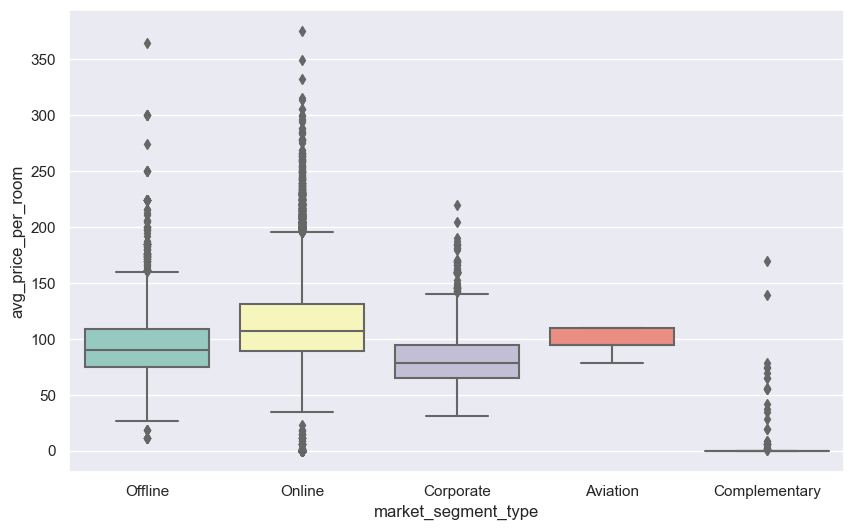

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(df, x="market_segment_type", y="avg_price_per_room",palette='Set3');

In [57]:
df.groupby('market_segment_type').agg({'avg_price_per_room':'mean'}).sort_values(by='avg_price_per_room',ascending=False).reset_index()

,market_segment_type,avg_price_per_room
0,Online,112.25685
1,Aviation,100.70400
2,Offline,91.59844
3,Corporate,82.91174
4,Complementary,3.14176


### Observations:
* Average Price of the room is around 100 euros around all market segments.
* Online segment has the highest Average room cost of 112 euros followed by Aviation.
* Distribution Shows a Right skewness.
* There are few bookings with zero price.
* Some of the bookings have above 500 euro price which can be an Outlier.




#### **4.What percentage of bookings are canceled?**:

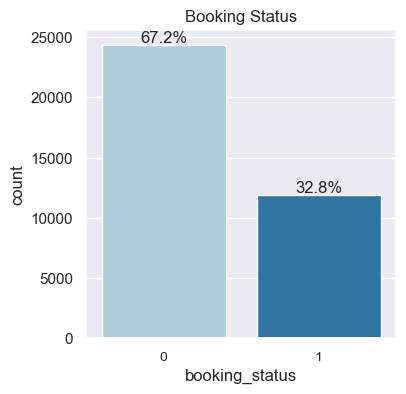

In [58]:
labeled_barplot(df, "booking_status","Booking Status", perc=True)

### Observations:
* 32.8% of guests have cancelled their bookings in 2 years.


#### **5.Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


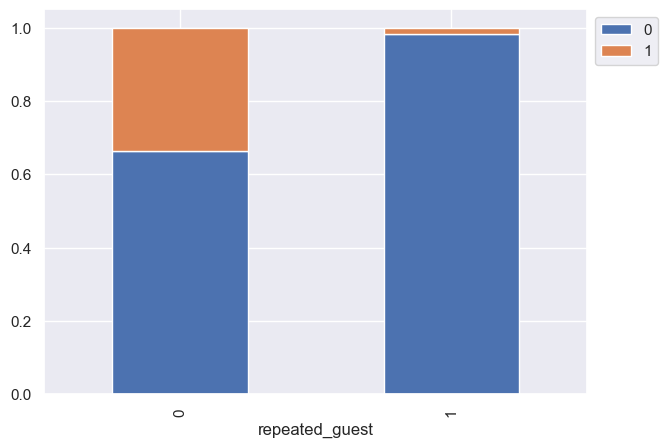

In [59]:
stacked_barplot(df, "repeated_guest", "booking_status")

In [60]:
df.groupby('repeated_guest')['booking_status'].value_counts(normalize=True)

repeated_guest  booking_status
0               0                0.66420
                1                0.33580
1               0                0.98280
                1                0.01720
Name: booking_status, dtype: float64

### Observations:

* Around 2% of bookings  made by the repeated guests were cancelled.


#### **6.Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


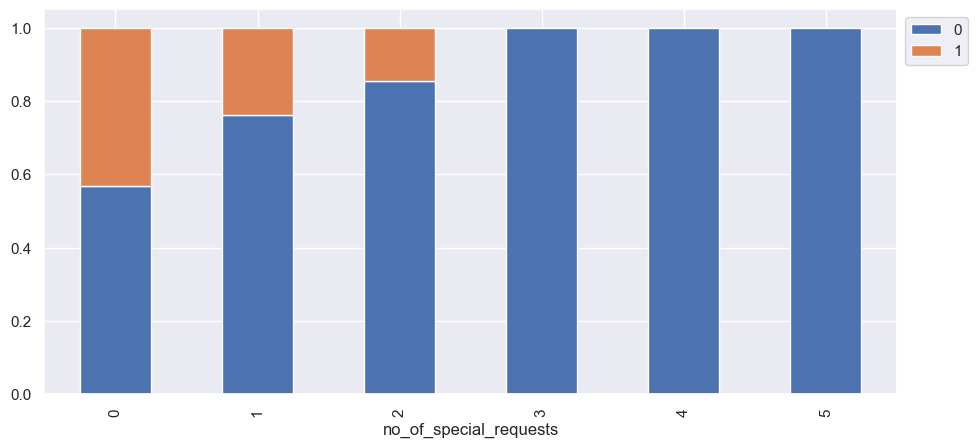

In [61]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

### Observations:

* There is a decline in Booking Cancellations with increase of special requests.


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [62]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

### Observations:

* There are no Missing Values in the data.


### Outlier detection and treatment

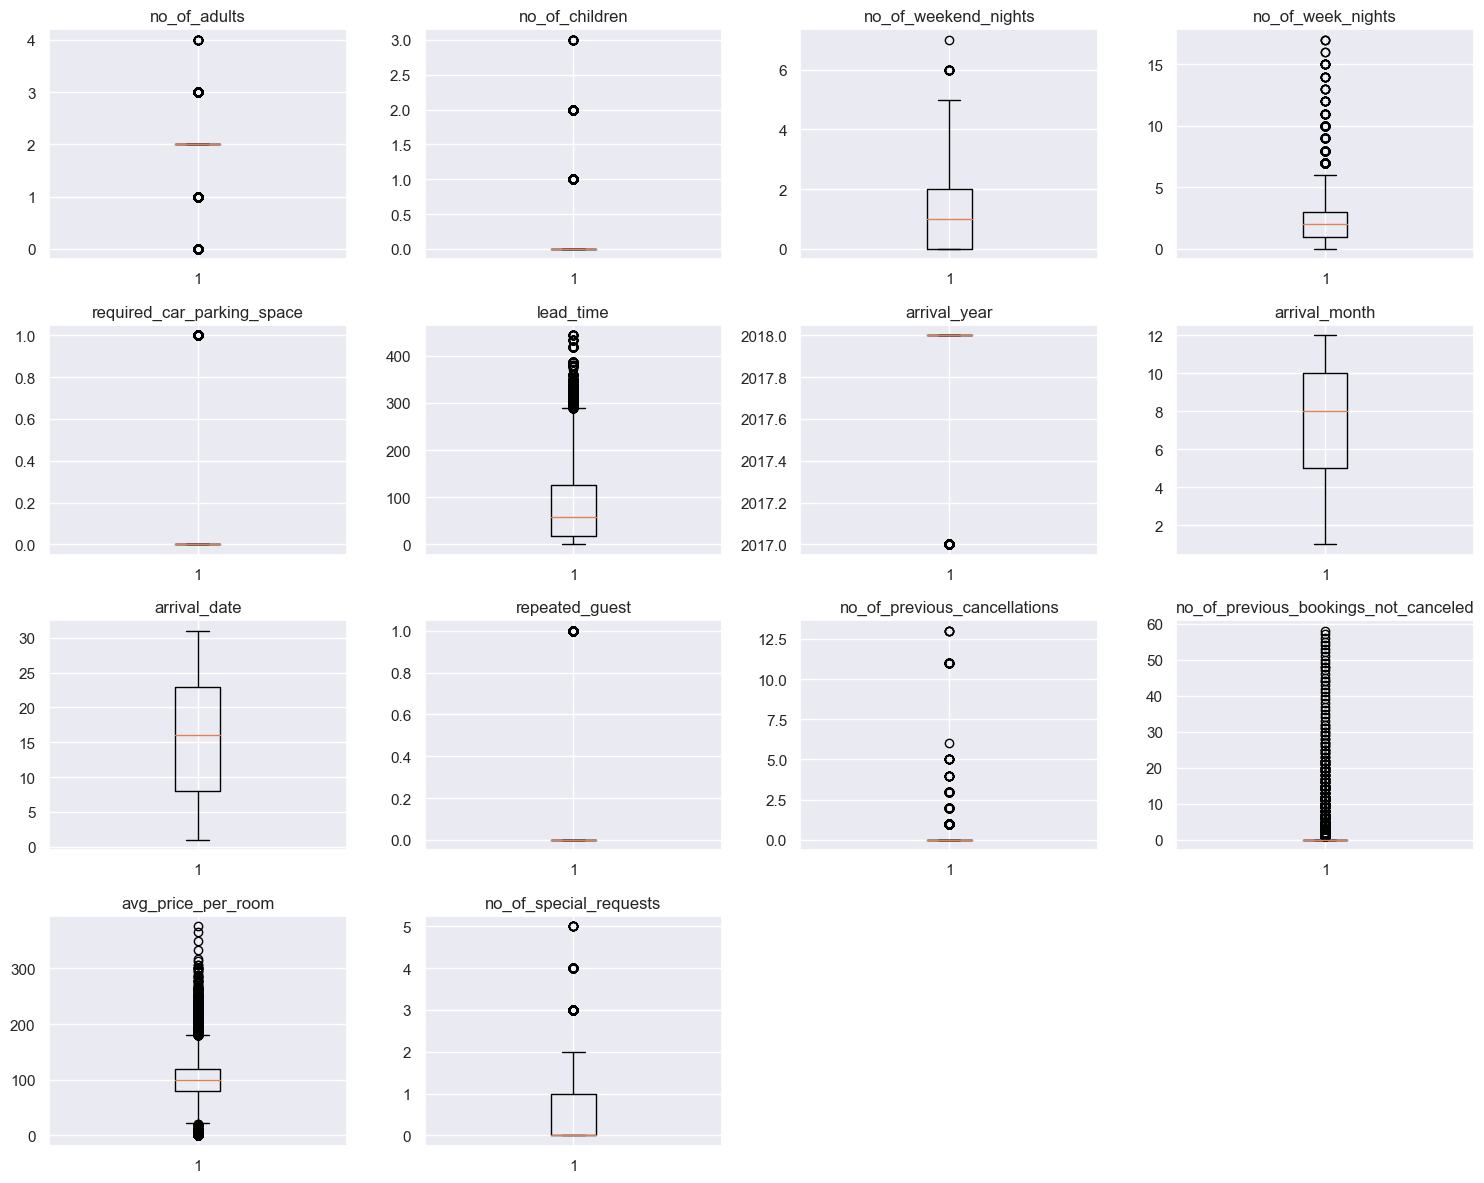

In [63]:
#Outlier detection using boxplot
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
#Dropping booking status
numerical_cols.remove('booking_status')
#Formula for outlier detection
plt.figure(figsize=(15,12))

for i, variable in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    plt.boxplot(df[variable],whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Observations:

* There are outliers present in the data. We will not treat them as they are proper values.


## Model Building

# **Logistic Regression**

#### Data Preparation for modeling (Logistic Regression)

In [64]:
#Independent and dependent variables being defined
x = df.drop(['booking_status'],axis=1)
y = df['booking_status']

#Adding constant
X = sm.add_constant(x)
X = pd.get_dummies(X,drop_first=True)

#Create a train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [65]:
print('Shape of the training set:',X_train.shape)
print('Shape of test set:', X_test.shape)
print('Percentage of Classes in Training Set:',y_train.value_counts(normalize=True))
print('Percentage of Classes in Test Set:',y_test.value_counts(normalize=True))

Shape of the training set: (25392, 28)
Shape of test set: (10883, 28)
Percentage of Classes in Training Set: 0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of Classes in Test Set: 0   0.67638
1   0.32362
Name: booking_status, dtype: float64


## Building a Logistic Regression model

In [66]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False) ## Complete the code to fit logistic regression

print(lg.summary()) ## Complete the code to print summary of the model

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sun, 18 Feb 2024   Pseudo R-squ.:                  0.3292
Time:                        22:42:55   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

### Observations:
* Negative values of the coefficient show that the probability of a booking getting cancelled decreases with the increase of the corresponding attribute value.

* Positive values of the coefficient show that the probability ofbooking getting cancelled increases with the increase of the corresponding attribute value.

* p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking.

### Which case is more important?
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

### Metric Functions

In [67]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [68]:
# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [69]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80600,0.63410,0.73971,0.68285


##  **Detecting and Dealing with Multicollinearity**

In [70]:
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [71]:
checking_vif(X_train)

,feature,VIF
0,const,39497686.20788
1,no_of_adults,1.35113
2,no_of_children,2.09358
3,no_of_weekend_nights,1.06948
4,no_of_week_nights,1.09571
5,required_car_parking_space,1.03997
6,lead_time,1.39517
7,arrival_year,1.43190
8,arrival_month,1.27633
9,arrival_date,1.00679



### Observations:
* There is no multicolinearity between the numerical Variables.
* We will ignore the VIF values for dummy variables and the constant (intercept)

## **Dealing with high p-value variables**

In [72]:
#Initial list of columns
cols = X_train.columns.tolist()

#Setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    #Defining the train set
    x_train_aux = X_train[cols]

    #Fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    #Getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    #Name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [73]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [74]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sun, 18 Feb 2024   Pseudo R-squ.:                  0.3282
Time:                        22:42:57   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600      0.000   -1151.758    -679.520
no_of_adults                       0.1088      0.037      2.914      0.

### **Coefficient interpretations**

* Coefficients of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests etc are negative, an increase in these will lead to a decrease in chances of a bookings getting cancelled.
* Coefficients of no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, avg_price_per_room, type_of_meal_plan_Not Selected etc are positive, an increase in these will lead to a increase in the chances of  bookings getting cancelled.

## **Checking performance of the new model**

### **Training set performance**

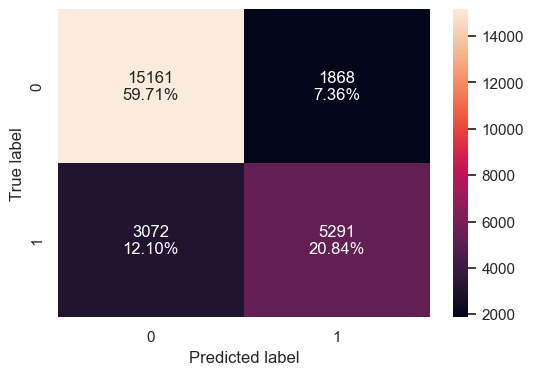

In [75]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [76]:
print("Training performance:")
log_model_train_perf=model_performance_classification_statsmodels(lg1, X_train1, y_train)
log_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


### Observations:
* There are no Variables with p-value>0.5.
* There is a negligible change in the performace of the model after dropping the varaibles with high p-value.

### **Testing set performance**

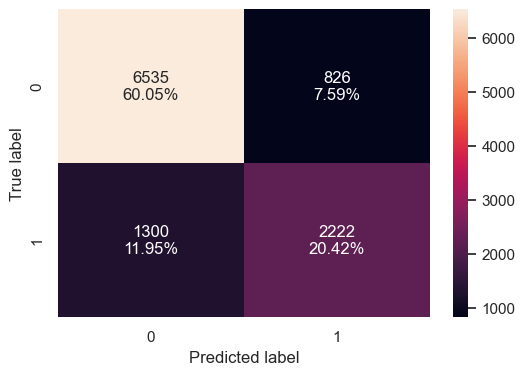

In [77]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [78]:
print("Test set  performance:")
log_reg_model_test_perf=model_performance_classification_statsmodels(lg1, X_test1, y_test)
log_reg_model_test_perf

Test set  performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


## **Converting coefficients to odds**

In [79]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11491,1.16546,1.11470,1.04258,0.20296,1.01583,1.57195,0.95839,0.06478,1.25712,1.01937,0.22996,1.17846,1.33109,0.70104,0.75364,0.47885,0.37977,0.23827,0.45326,0.16773
Change_odd%,-100.00000,11.49096,16.54593,11.46966,4.25841,-79.70395,1.58331,57.19508,-4.16120,-93.52180,25.71181,1.93684,-77.00374,17.84641,33.10947,-29.89588,-24.63551,-52.11548,-62.02290,-76.17294,-54.67373,-83.22724


## Observation:

* **Number of adults**: Holding all other features constant a 1 unit change in Number of adults will  increase the odds of cancelling of the booking by 11.5%
* **Number of children**: Holding all other features constant a 1 unit change in Number of children will  increase the odds of cancelling of the booking by 16.6%
* **Number of weekend nights**: Holding all other features constant a 1 unit change in Number of weekend nights will  increase the odds of cancelling of the booking by 11.5%
* **Number of week nights**: Holding all other features constant a 1 unit change in Number of week nights will  increase the odds of cancelling of the booking by 4.3%.
* **Required parking space**: Holding all other features constant a 1 unit change in Required parking space will  decrease the odds of cancelling of the booking by 78.7%.
* **Lead time**: Holding all other features constant a 1 unit change in Lead time will  increase the odds of cancelling of the booking by 1.6%.
* **Arrival month**: Holding all other features constant a 1 unit change in Arrival month will  decrease the odds of cancelling of the booking by 4.2%.
* **repeated_guest**: Holding all other features constant a 1 unit change in repeated_guest	 will  decrease the odds of cancelling of the booking by 93.6%.
* **number of previous cancellations**: Holding all other features constant a 1 unit change in number of previous cancellations will  increase the odds of cancelling of the booking by 25.7%.
* **Average price per room**: Holding all other features constant a 1 unit change in Average price per room will  increase the odds of cancelling of the booking by 2%.
* **number of special requests**: Holding all other features constant a 1 unit change in number of special requests will  decrease the odds of cancelling of the booking by 77%.


## **Model Performance Improvement**

### **ROC Curve and ROC-AUC**

* ROC-AUC on training set

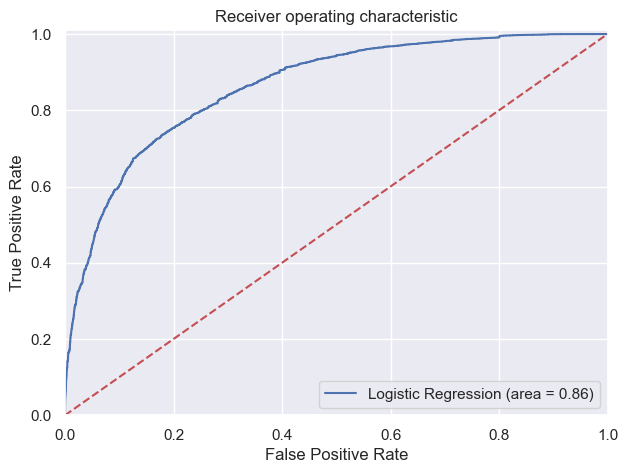

In [80]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Logistic Regression model is giving a good performance on training set.

## **Optimal threshold using AUC-ROC curve**

In [81]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3700522558707991


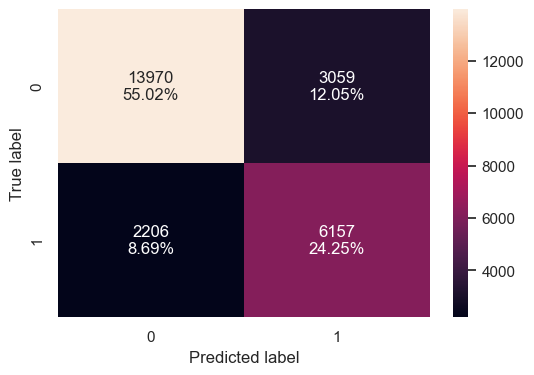

In [82]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)

In [83]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79265,0.73622,0.66808,0.70049


* There is an increase in Recall and F1 Score with the new Threshold.
* A slight drop in the Accuracy and Precision Score.

### **Checking model performance on test set**

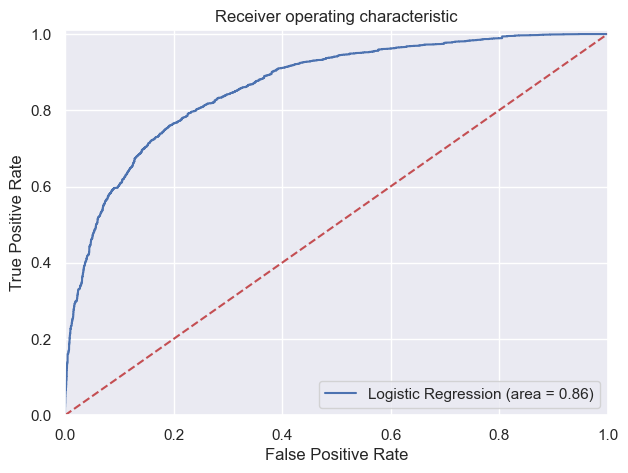

In [84]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

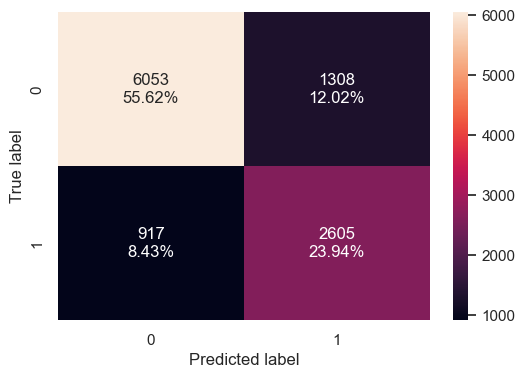

In [85]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [86]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79555,0.73964,0.66573,0.70074


### **Precision-Recall Curve**

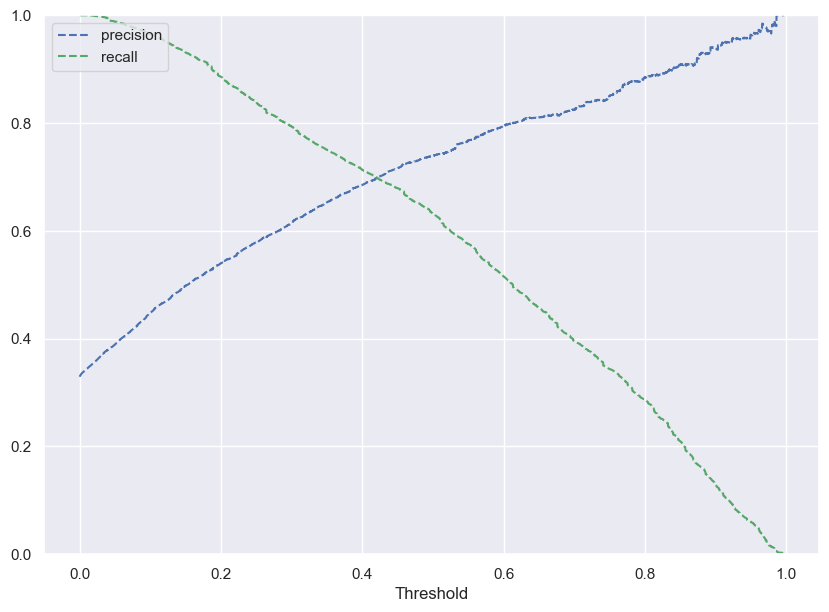

In [87]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.42, we get balanced recall and precision.

In [88]:
# setting the threshold
optimal_threshold_curve = 0.42

### **Checking model performance on training set**

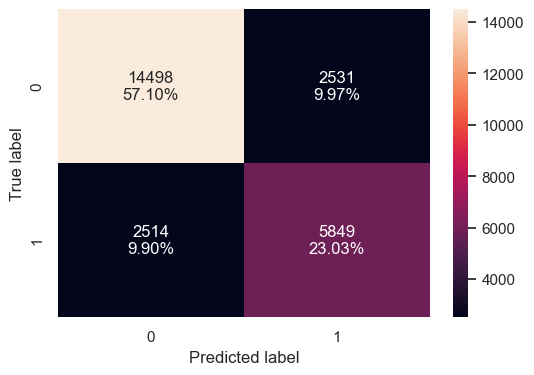

In [89]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [90]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80132,0.69939,0.69797,0.69868


* There is a drop in the f1 score and Recall as the threshold was decreased.



#### Let's check the performance on the test set

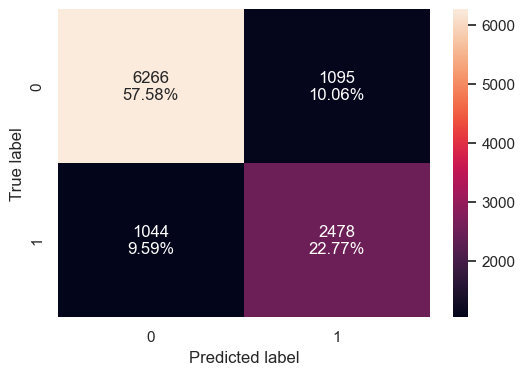

In [91]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [92]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80345,0.70358,0.69353,0.69852


## Final Model Summary

## **Model Performance Comparison and Final Model Selection**

In [93]:
#Model Comparison Training Set
models_train_comp_df = pd.concat(
    [
        log_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80545,0.79265,0.80132
Recall,0.63267,0.73622,0.69939
Precision,0.73907,0.66808,0.69797
F1,0.68174,0.70049,0.69868


In [94]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79555,0.80345
Recall,0.63089,0.73964,0.70358
Precision,0.72900,0.66573,0.69353
F1,0.67641,0.70074,0.69852


### **Observation:**

* Almost all the three models are performing well on both training and test data without the problem of overfitting
* The model with a  threshold (0.37) is giving the best F1 score and Recall. Therefore it can be selected as the final model

# Decision Tree

# Data Preparation for Modeling

In [95]:
#Creating independent and dependent variables
X = df.drop(['booking_status'],axis=1)
Y = df['booking_status']

#Create dummy variables
X = pd.get_dummies(X, drop_first=True)

#Splitting for training and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [96]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


## Building a Decision Tree model

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [97]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [98]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### **Decision Tree (default)**

In [99]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## **Checking model performance on training set**

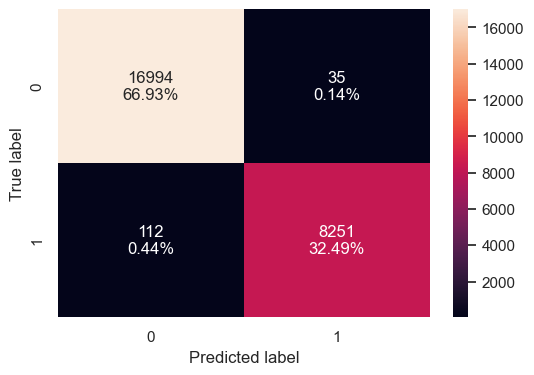

In [100]:
confusion_matrix_sklearn(model,X_train,y_train)

In [101]:
decision_tree_perf_train_default = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train_default

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


## **Checking model performance on Test set**

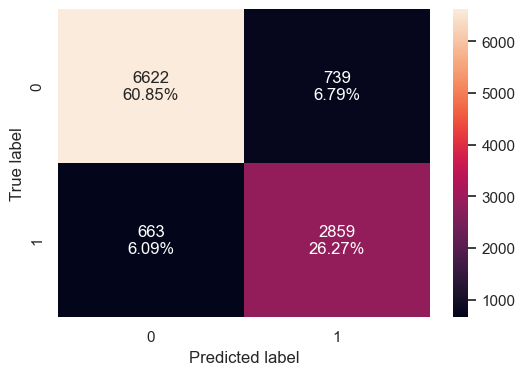

In [102]:
confusion_matrix_sklearn(model,X_test,y_test)

In [103]:
decision_tree_perf_test_default = model_performance_classification_sklearn(model,X_test,y_test)
decision_tree_perf_test_default

,Accuracy,Recall,Precision,F1
0,0.87118,0.81175,0.79461,0.80309


### Observation:
The Model is performing better on Training set than on the Testing set indicating an Overfitting Model.

### **Decision Tree With Class_weight**

In [104]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

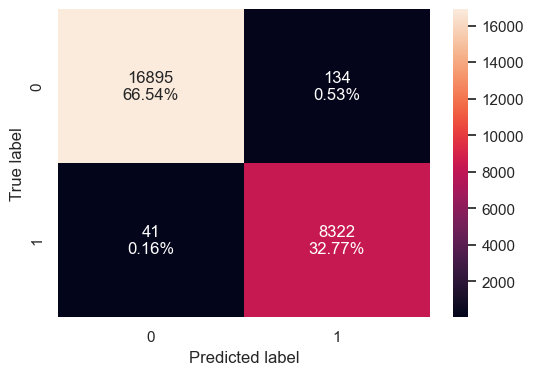

In [105]:
confusion_matrix_sklearn(model, X_train, y_train)

In [106]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99311,0.99510,0.98415,0.98960


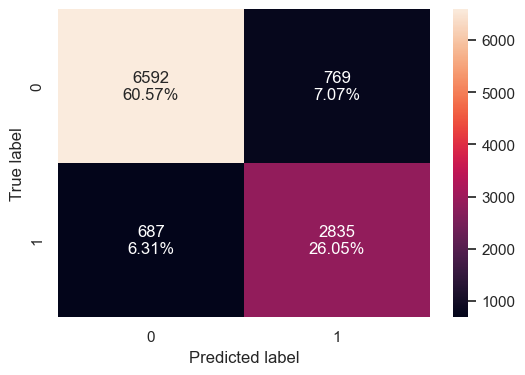

In [107]:
confusion_matrix_sklearn(model, X_test, y_test)

In [108]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.86621,0.80494,0.78663,0.79568


### Observation:
The Model is still  performing better on Training set than on the Testing set indicating an Overfitting Model with class weight adjustment.

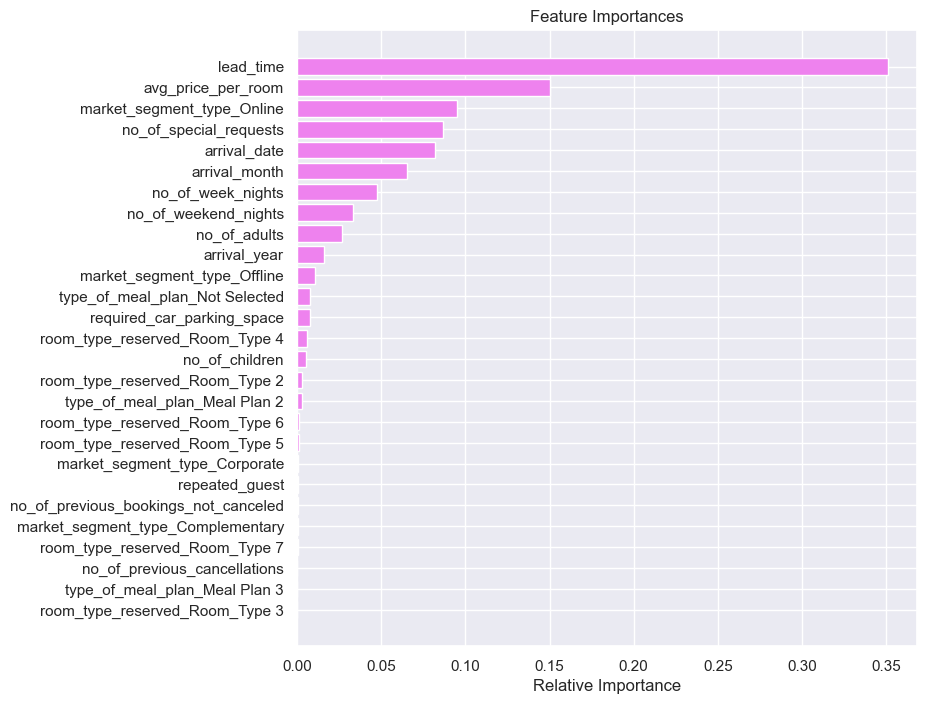

In [109]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observation:
* The Model shows that the Lead time is the most important feature followed by the Average price per room.

## Do we need to prune the tree?

As the Model is Overfitting we will try to reduce it by Pruning Techniques.

## **Let's use pruning techniques to try and reduce overfitting.**

## **Decision Tree (Pre-pruning)**

### Using GridSearch for Hyperparameter tuning of our tree model

In [110]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

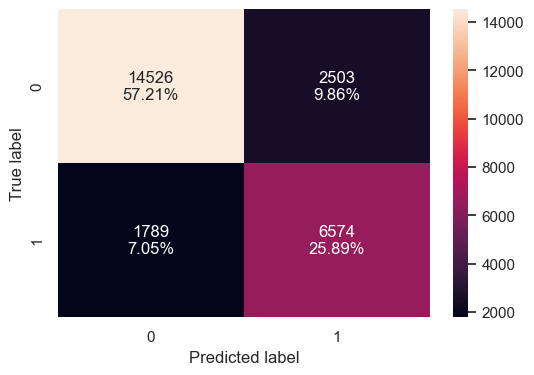

In [111]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [112]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83097,0.78608,0.72425,0.75390


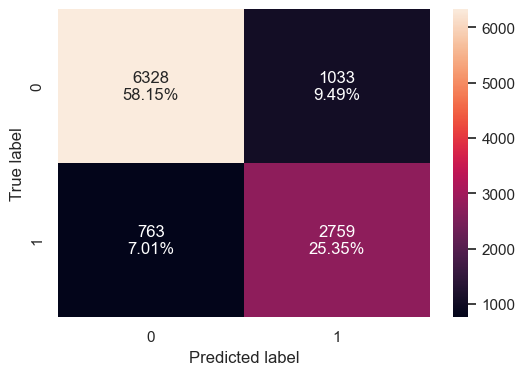

In [113]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [114]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


### Observation:
The model is giving a generalized result now since the f1 scores on both the train and test data are coming to be around 0.75 which shows that the model is able to generalize well on unseen data.

### **Visualizing the Decision Tree**

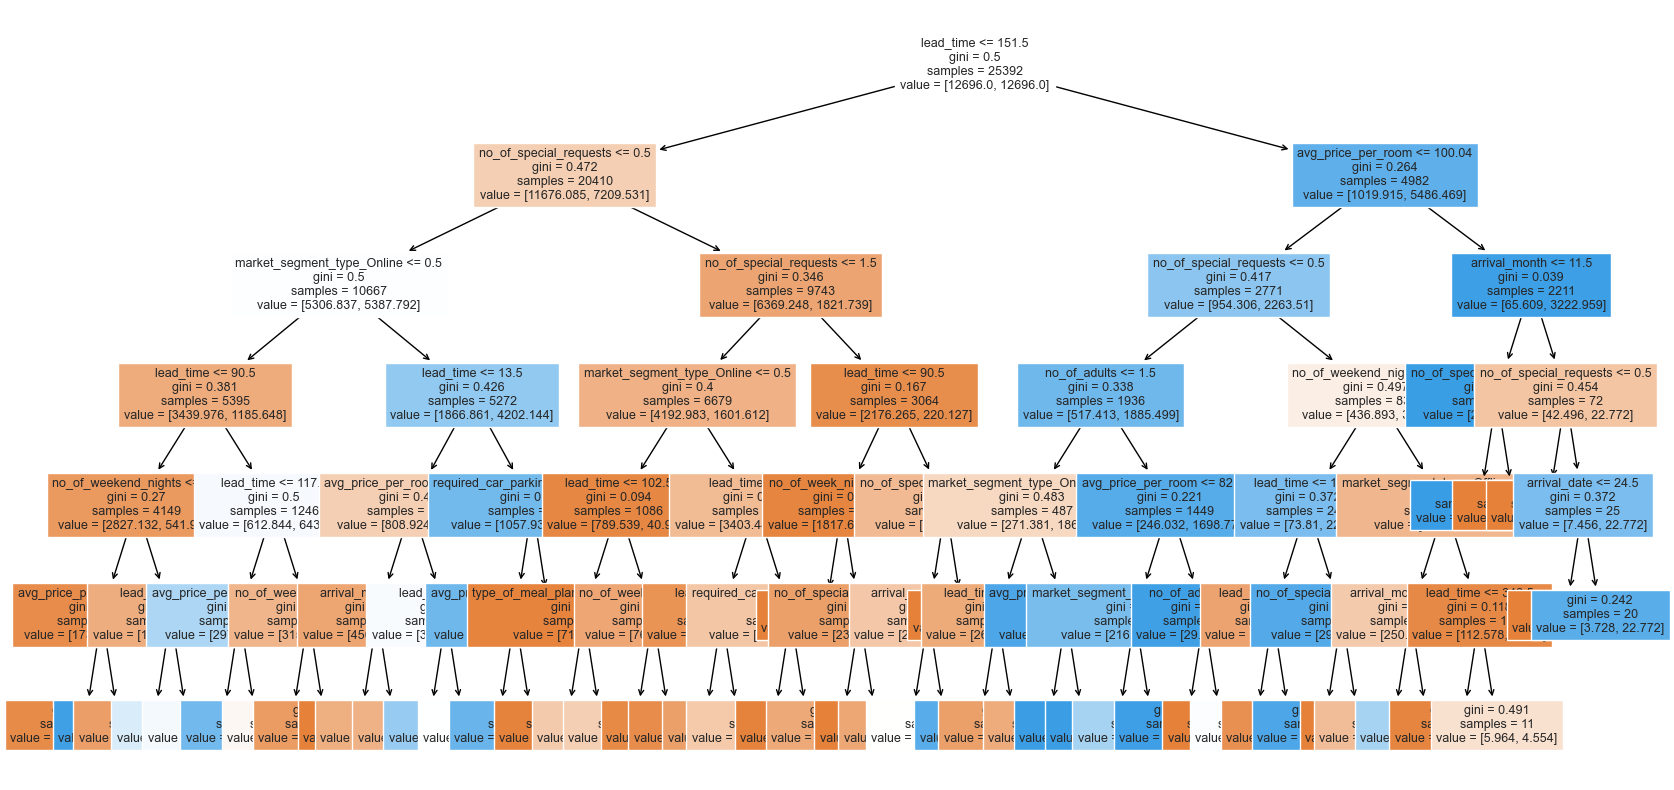

In [115]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [116]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

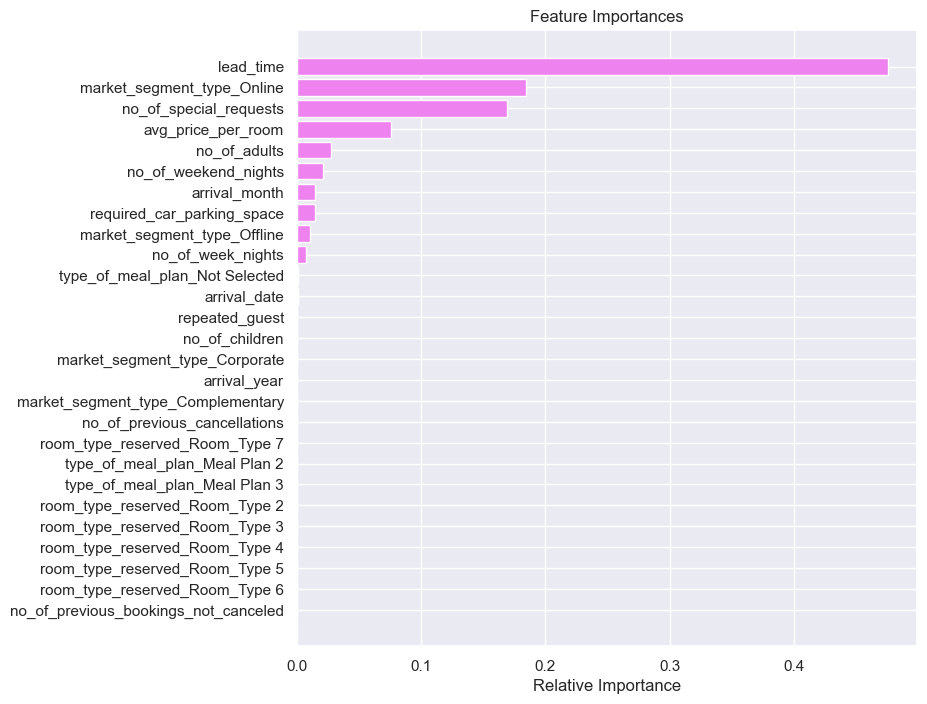

In [117]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observation:
* In the prepruned decision tree , lead time and Market segment type Online are the most important features.
* Average price per room has been less significant after pruning compared to the default Decision Tree.

## **Decision Tree (Post pruning)**

### **Cost Complexity Pruning**

In [118]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [119]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1839,0.00890,0.32806
1840,0.00980,0.33786
1841,0.01272,0.35058
1842,0.03412,0.41882


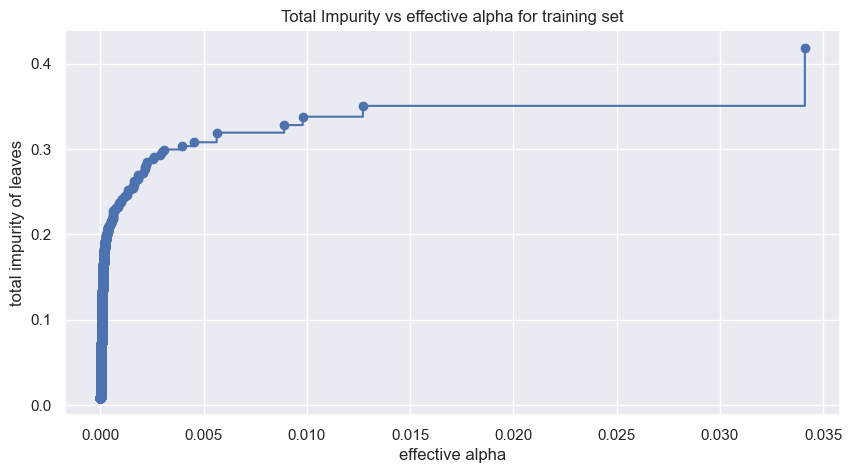

In [120]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

### Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [121]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


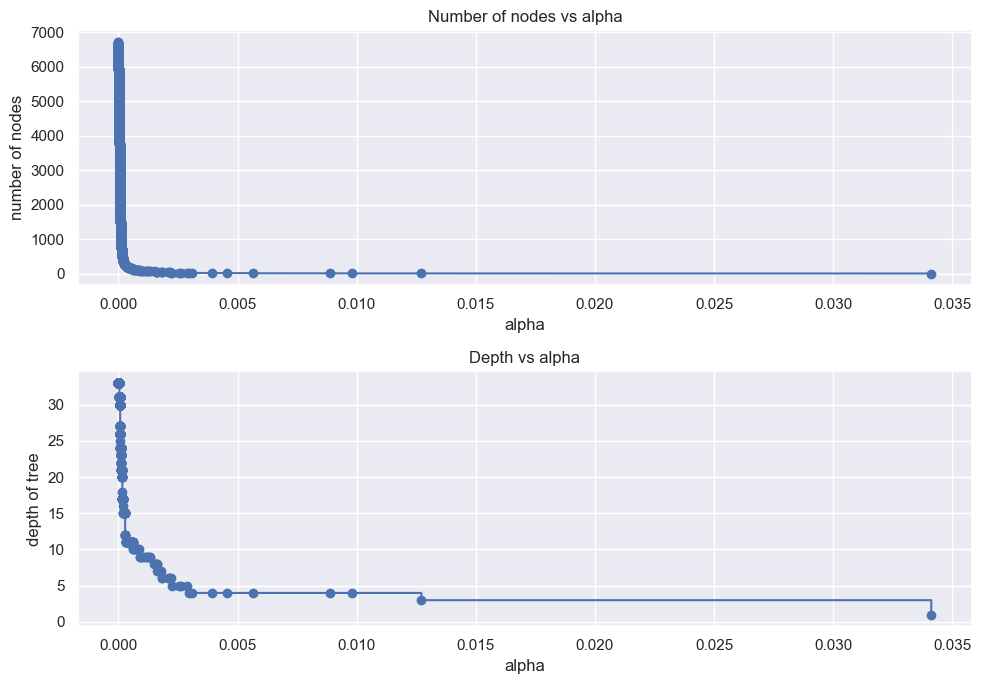

In [122]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### **F1 Score vs alpha for training and testing sets**

In [123]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

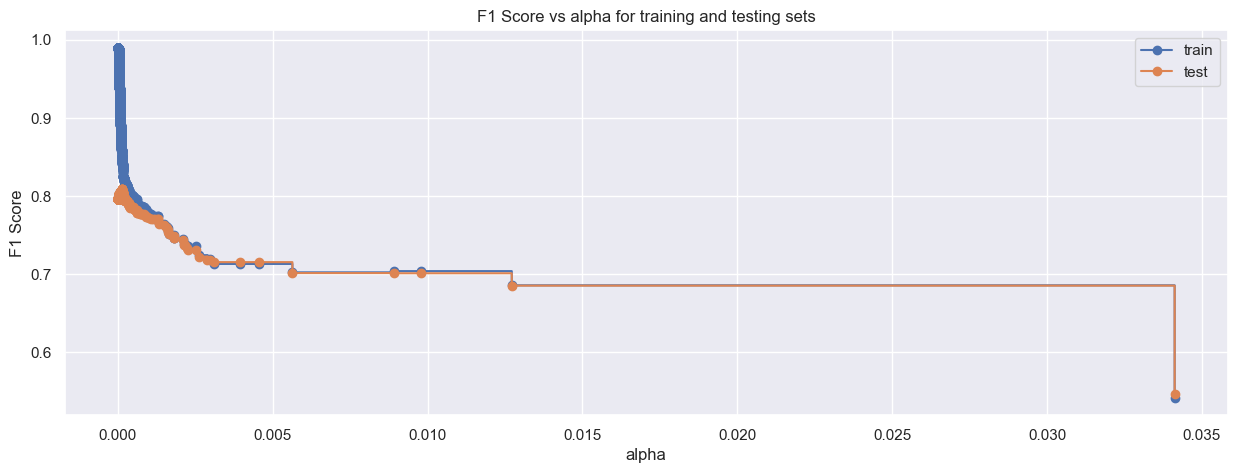

In [124]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [125]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167043,
                       class_weight='balanced', random_state=1)


#### **Checking performance on training set**

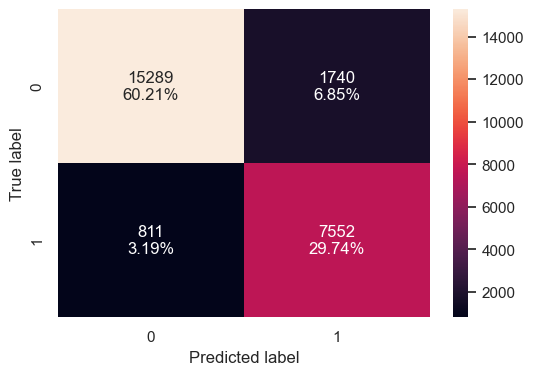

In [126]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [127]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89954,0.90303,0.81274,0.85551


#### **Checking performance on test set**

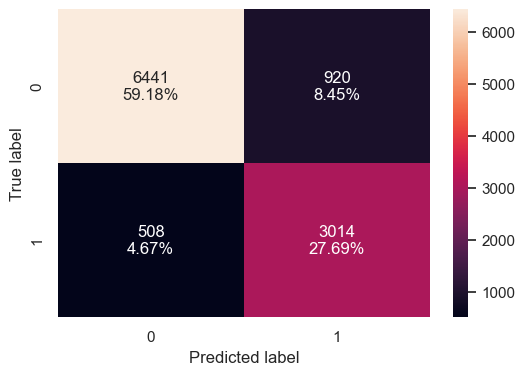

In [128]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [129]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.86879,0.85576,0.76614,0.80848


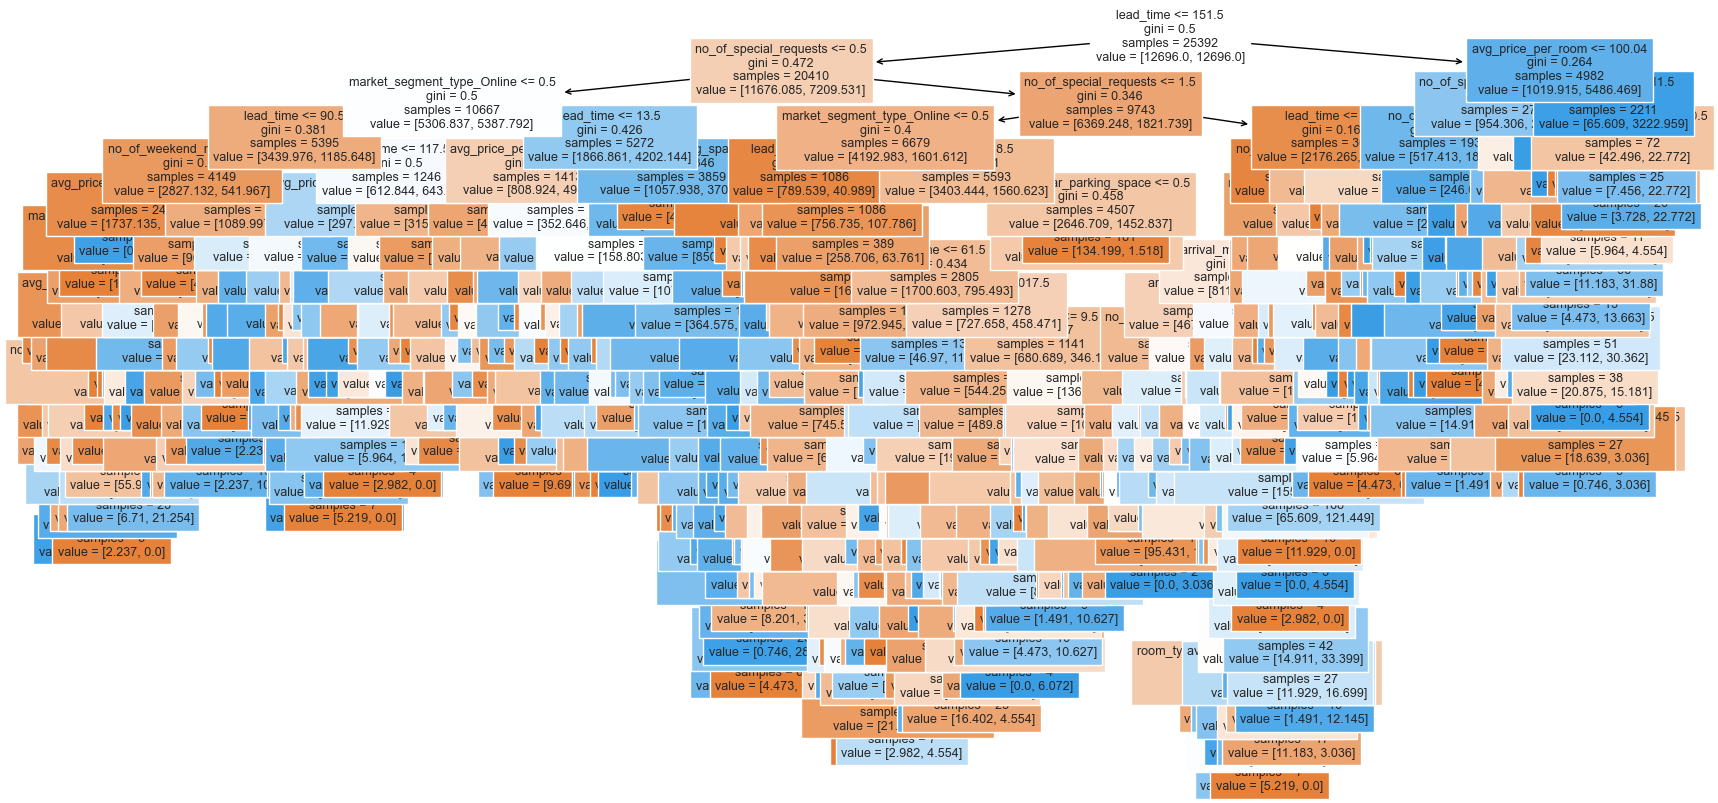

In [130]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [131]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

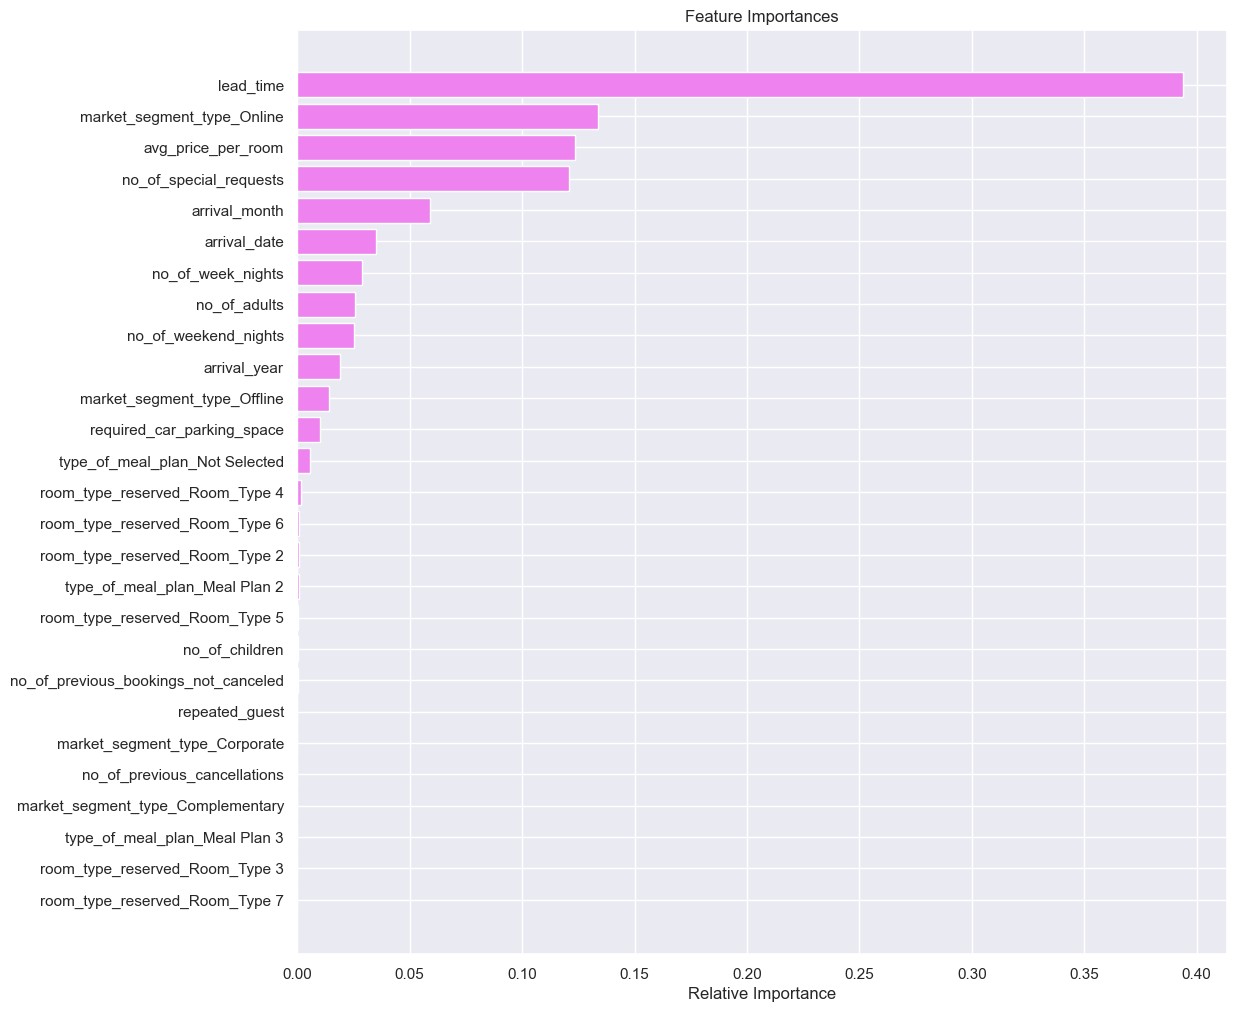

In [132]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observation:
* In the postpruned decision tree also, lead time and Market segment type Online are the most important features.
* The Lead Time is a commom Important Feature in all the Decision Trees.


## Model Performance Comparison and Conclusions

In [133]:
# training performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_train_default.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Train set performance comparison:")
models_test_comp_df

Train set performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.99311,0.83097,0.89954
Recall,0.98661,0.99510,0.78608,0.90303
Precision,0.99578,0.98415,0.72425,0.81274
F1,0.99117,0.98960,0.75390,0.85551


In [134]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_default.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87118,0.86621,0.83497,0.86879
Recall,0.81175,0.80494,0.78336,0.85576
Precision,0.79461,0.78663,0.72758,0.76614
F1,0.80309,0.79568,0.75444,0.80848


### Observation:

* Out of all the models **Prepruned Decision Tree** shows **no Overfitting** as the difference in the values of **F1 score, Recall and Precision** are comparably close between the training and the testing set.
* The Post pruned Model and the Default Model with and without Class weight parameter have a higher scores compared to the Pre pruned Model on the training set but they cannot be generalized to the test set as they have a difference in the score of more than 2% in the training and the test set.
*We will choose the **Pre pruned tree** as the **best model** since it is giving a comparably close scores on the train and test sets than the other models.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

* Decision Tree model performs better on both the training and testing dataset.
* According to the Model generated Lead time is the most important feature deciding the booking status.
*  From the decision tree, it has been observed that if the lead_time is less than or equal to 151 days , no_of_special_requests is less than or equal to 0.50, market_segment_type_Online is less than or equal to 0.50 then the Booking is most likey to be cancelled.

### Recommendations:

* The model built can be used to predict if a booking will be made or not and can correctly identify 78.3% of booking status.
* Lead time of less than 151 days for the booking  increases the chances of cancellation of the booking so care should be taken to ensure that the requirements of the customer about the room are met and policy should be revised on cancellation charges to reduce the losses.
* Refund policy on Last minute cancellations must be revised on online bookings and refunds must be alloted based on the days of arrival date to minimize huge losses. 
* Average price of the room can be reduced (except for the Room Type 1)to increase the bookings during the busiest months to increase the profit as those rooms are not been opted by most of the customers.
* It is evident that increase in the Number of special request tend to decrease in the cancellation of booking by the guests, so proper care must be taken by the management to provide to the special requests of the guests if its possible.  
* The model shows that the Online market segment has the most number of cancelllations so terms of booking and cancellation must be  revised to reduce the cancellations.
* The hotel can provide Online promotional offers during the months where the guest engagement is less for example in January.
* Many Guests have not opted for any of the meal plan provided so their is a room for improvement in that area.
* Fun Activities or recreational places can be built around the premise to attract both  adults and children  to increase the engagement of the hotel.
* A review System should be provided for the guests to provide feedback on the hospitality of the hotel and its different aspects like ambience of the room, food etc  to improve the guest satisfaction.
* There are very few repeated customers and the cancellation rate is lower in this segment of guests so a loyalty program should be carried out, this will help in both retaining the guests and also acts as a promotion for new and revisiting guests.
